## FIRST TESTS

In [ ]:
!pip install pykan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
from kan import *
from mpl_toolkits.mplot3d import axes3d
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np
import time

In [ ]:
import copy

## Functions

In [ ]:
def ThreeD_plot_prediction_vs_actual(predicted, ground_truth, input, xlabel='Input Dimension 1', ylabel='Input Dimension 2', zlabel='Output'):
    '''
    Plots 3d plot that shows actual labels (ground_truth) vs the predicted values given a 2d input

    predicted: torch.tensor -> size([n, 1])
    ground_trurh: torch.tensor -> size([n, 1])
    input: torch.tensor -> size([n, 2])
    xlabel: string
    ylabel: string
    zlabel: string
    '''
    pred_np = predicted.detach().numpy()
    actual_np = ground_truth.numpy()
    inputs_np = input.numpy()

    # Create a 3D figure
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the prediction data
    ax.scatter(inputs_np[:, 0], inputs_np[:, 1], pred_np, label='Prediction', color='blue', marker='o')

    # Plot the actual data
    ax.scatter(inputs_np[:, 0], inputs_np[:, 1], actual_np, label='Actual', color='red', marker='^')

    # Axis labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)

    # Title and legend
    ax.set_title('Comparison of Prediction vs Actual in 3D')
    ax.legend()

    # Show the graph
    plt.show()

def plot_2d(ax, data, title='title', xlabel='xlabel', ylabel='ylabel', label='', show_knots=True, show_grid=True, step_size=1):
    '''
    Plots a 2D graph with the input 1-dimensional data on the given axis.

    Parameters:
        ax: the axis to plot on
        data: list (1D), data to be plotted
        title: str, title of the plot (default 'title')
        xlabel: str, label for the x-axis (default 'xlabel')
        ylabel: str, label for the y-axis (default 'ylabel')
        label: str, label for the legend (default '')
        show_knots: bool, whether to show knots (markers) (default True)
        show_grid: bool, whether to show grid lines (default True)
        step_size: int, step size for the x-axis ticks (default 1)
    '''
    marker = 'o' if show_knots else ''  # Use marker 'o' if show_knots is True, otherwise no marker
    ax.plot(data, color='red', marker=marker)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.grid(show_grid)  # Set grid visibility based on show_grid parameter
    ax.set_xticks(range(0, len(data), step_size))  # Set x-axis ticks with the given step size

    if label:  # Only add legend if label is provided
        ax.legend()

def number_parameters(model):
    '''
    Counts the number of parameters for a KAN model

    Parameters:
    model: KAN
    '''
    n_par = 0
    for i in range(len(model.width) - 1):
        n_par = n_par + model.width[i] * model.width[i + 1]
    return n_par * (model.grid + model.k)


### TESTS
1: f(x, y) = x * y = (1/4)*[(x+y)^2 - (x-y)^2]

Due to the Kolmogorov Arnold Theorem, we know that this dataset can be represented through a [2, 2, 1] KAN


Text(0.5, 0, 'f(X1, X2)')

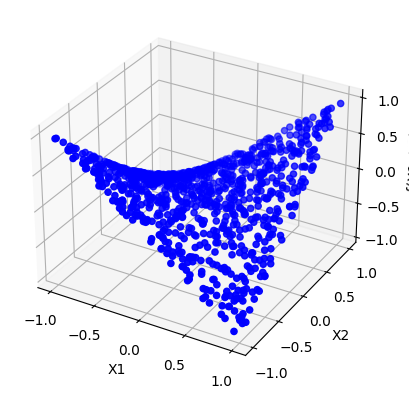

In [ ]:
# Create dataset and visualize it
f = lambda x: x[:, [0]] * x[:, [1]]

dataset = create_dataset(f, n_var=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['train_input'][:, 0], dataset['train_input'][:, 1], dataset['train_label'], c='b', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

In [ ]:
print('Train input data:', dataset['train_input'].size(), end=' ')
print('Train label data:', dataset['train_label'].size())
print('\nTest input data:', dataset['test_input'].size(), end=' ')
print('Test label data:', dataset['test_label'].size())

Train input data: torch.Size([1000, 2]) Train label data: torch.Size([1000, 1])

Test input data: torch.Size([1000, 2]) Test label data: torch.Size([1000, 1])


### Train KAN (grid=3)

Number of parameters: 36


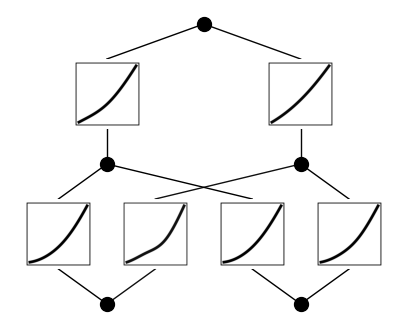

In [ ]:
# initialize KAN with G=3
model = KAN(width=[2,2,1], grid=3, k=3)

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)
print('Number of parameters:', number_parameters(model))

train loss: 3.82e-03 | test loss: 4.00e-03 | reg: 7.37e+00 : 100%|██| 20/20 [00:08<00:00,  2.45it/s]


Training time: 8.18397307395935


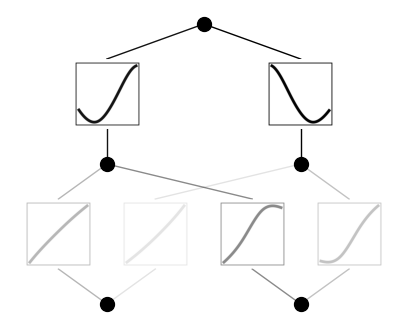

In [ ]:
# Train and plot the model after training
st = time.time()
results = model.train(dataset, opt="LBFGS", steps=20);
et = time.time()
print(f"Training time: {et-st}")
model.plot()

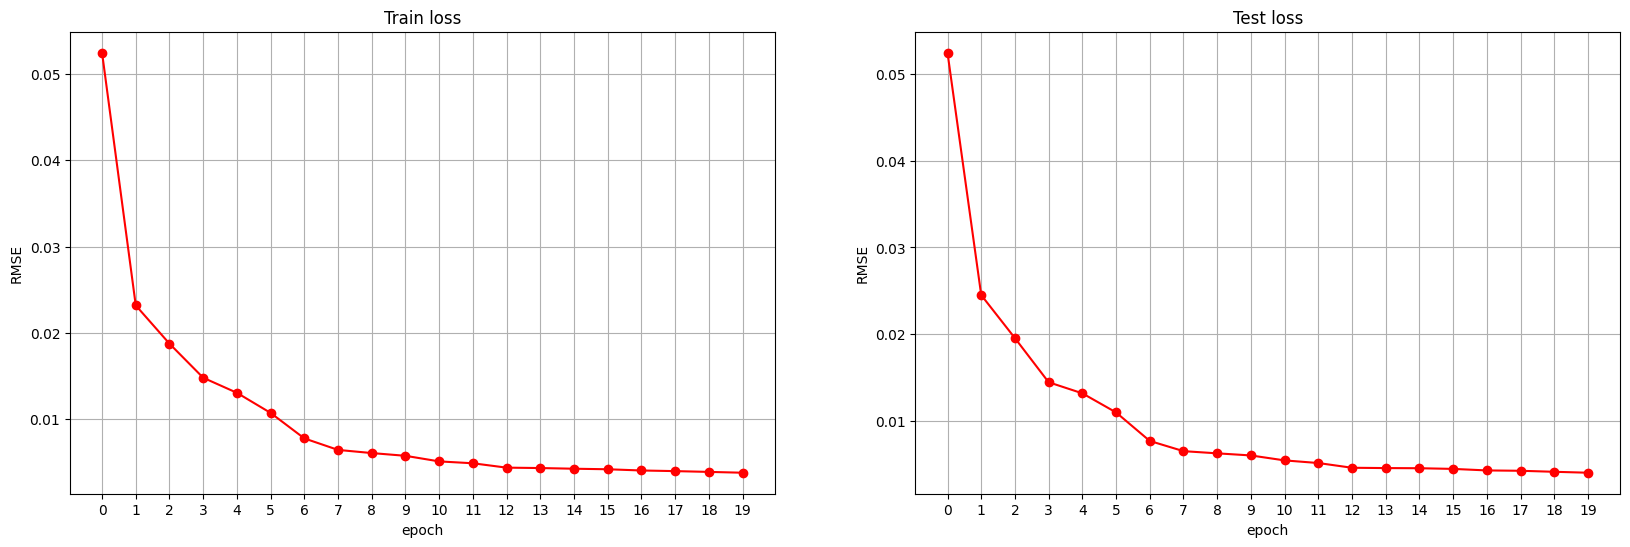

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_2d(axes[0], results['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE')
plot_2d(axes[1], results['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE')

Visualizing results

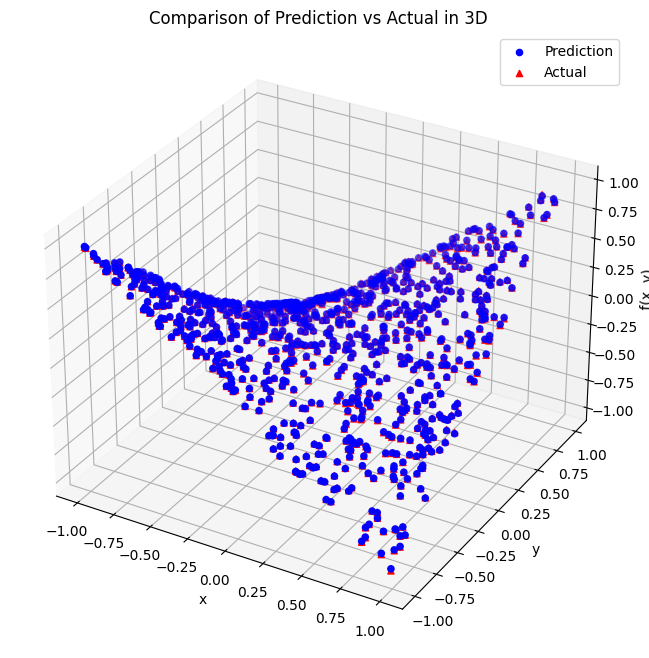

In [ ]:
# Perform a forward pass to get predictions
predicted = model(dataset['test_input'])
# Plot comparison of predicted vs real function values for created input
ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'], xlabel='x', ylabel='y', zlabel='f(x, y)')

### REFINING THE GRID

### Train with grid = 10

Initialization with grid = 10


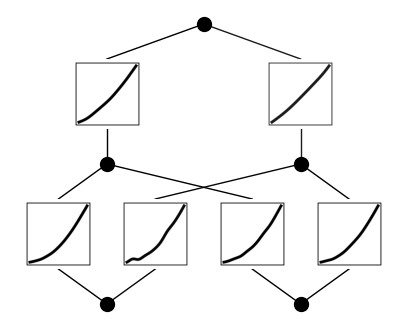

In [ ]:
# Initialize a more fine-grained KAN with G=10
model2 = KAN(width=[2,2,1], grid=10, k=3)
# Initialize model2 from model

# Plot KAN with grid = 10 at initialization
model2(dataset['train_input'])
print("Initialization with grid = 10")
model2.plot(beta=100)

train loss: 3.92e-02 | test loss: 4.49e-02 | reg: 6.83e+00 : 100%|██| 20/20 [00:07<00:00,  2.81it/s]


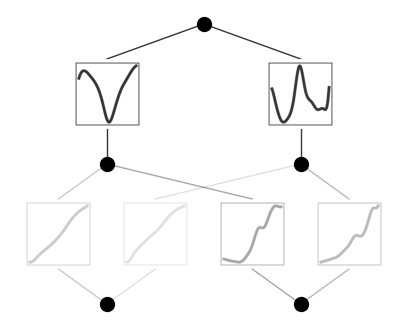

In [ ]:
# Train
results2 = model2.train(dataset, opt="LBFGS", steps=20);
model2.plot()

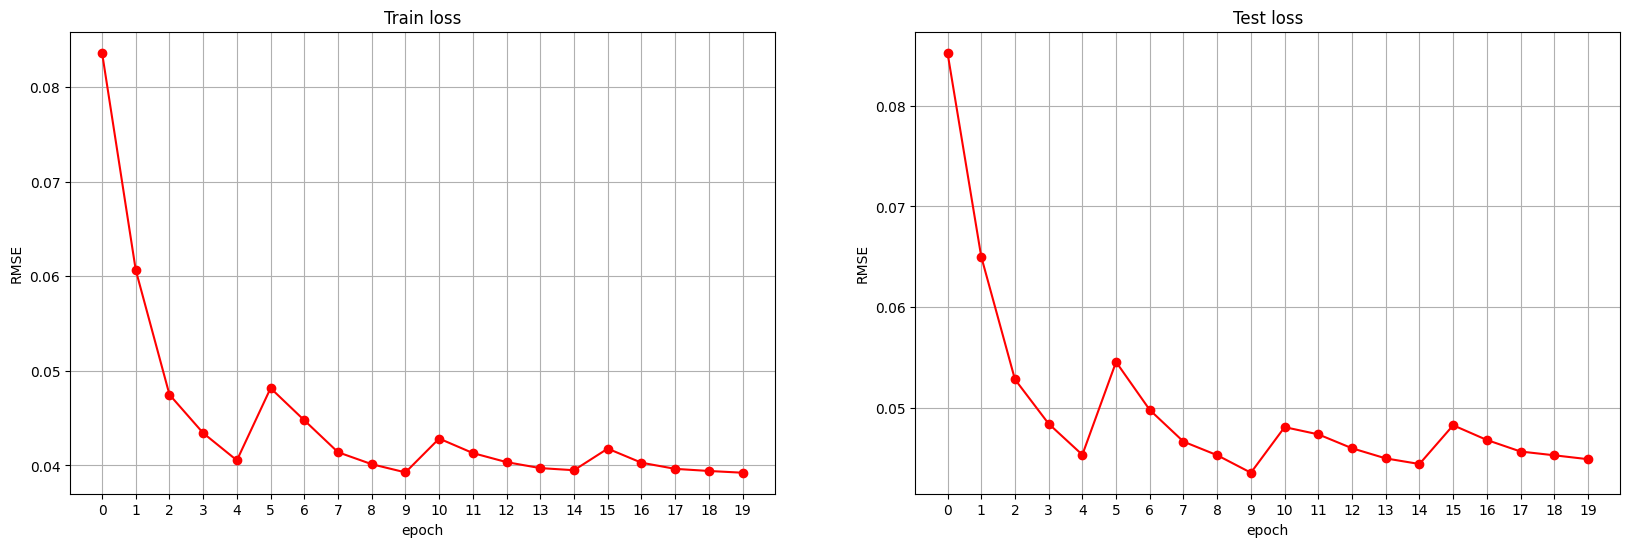

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Generate losses plots
plot_2d(axes[0], results2['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE')
plot_2d(axes[1], results2['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE')

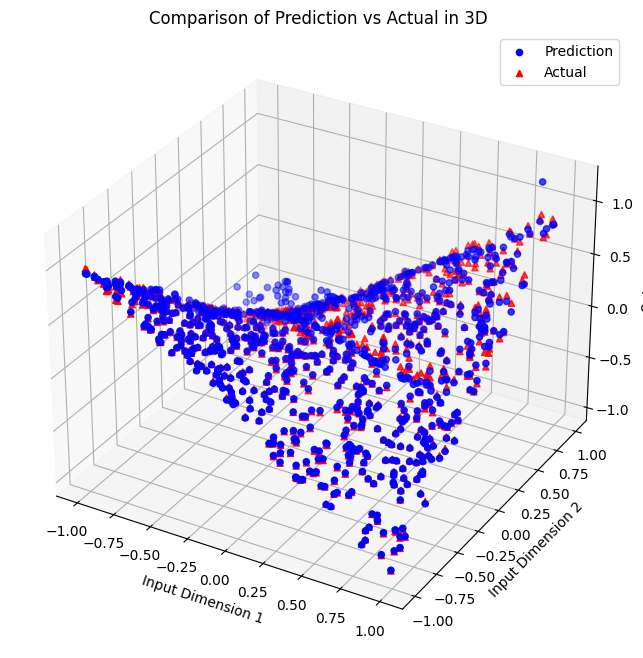

In [ ]:
# Perform a forward pass to get predictions
predicted = model2(dataset['test_input'])
# Plot comparison of predicted vs real function values for created input
ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'])

How do the loss change as we train and keep refining the grid?

In [ ]:
# We will use grids of sizes:
grids = np.array([5,10,20,50,100])

train_losses = []
test_losses = []
steps = 50
k = 3 # Degree of B-splines involved
n_params = []

# Iterate through all grid sizes while training the same [2,2,1] KAN
start_time = time.time()  # Start the timer

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    n_params.append([number_parameters(model)])
    start_time = time.time()  # Start the timer
    results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30) # Train initialized model with according grid size
    # Concat train and test losses
    train_losses += results['train_loss']
    test_losses += results['test_loss']

end_time = time.time()  # End the timer
print(f"\nTotal Training time: {end_time-start_time} seconds")

train loss: 1.60e-03 | test loss: 1.69e-03 | reg: 7.65e+00 : 100%|██| 50/50 [00:17<00:00,  2.79it/s]
train loss: 7.47e-04 | test loss: 9.11e-04 | reg: 8.79e+00 : 100%|██| 50/50 [00:18<00:00,  2.65it/s]
train loss: 1.12e-03 | test loss: 1.31e-03 | reg: 8.75e+00 : 100%|██| 50/50 [00:22<00:00,  2.18it/s]
train loss: 1.32e-01 | test loss: 4.09e-01 | reg: 5.99e+00 : 100%|██| 50/50 [00:31<00:00,  1.60it/s]
train loss: 5.71e-02 | test loss: 1.38e-01 | reg: 5.96e+00 : 100%|██| 50/50 [00:44<00:00,  1.12it/s]


Total Training time: 44.852718114852905 seconds


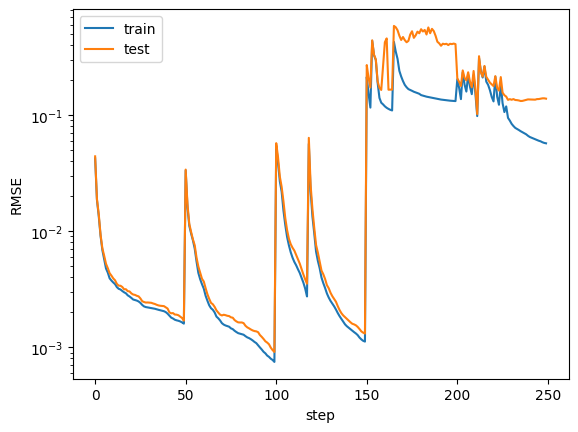

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

### Now check the number of parameters of each KAN and how do they scale compared against neural scaling law

Text(0, 0.5, 'MSE')

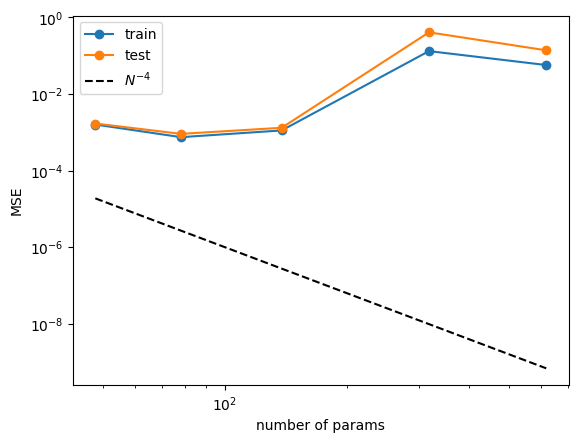

In [ ]:
n_params = np.array(n_params)
train_vs_G = train_losses[(steps-1)::steps]
test_vs_G = test_losses[(steps-1)::steps]
plt.plot(n_params, train_vs_G, marker="o")
plt.plot(n_params, test_vs_G, marker="o")
plt.plot(n_params, 100*n_params**(-4.), ls="--", color="black")
plt.xscale('log')
plt.yscale('log')
plt.legend(['train', 'test', r'$N^{-4}$'])
plt.xlabel('number of params')
plt.ylabel('MSE')

In [ ]:
for gsize, nparams, trmse, temse in zip(grids,n_params, train_vs_G, test_vs_G):
    print(f'KAN[2, 1, 1] with grid_size = {gsize}, uses {nparams} parameters. Train MSE: {trmse}\tTest MSE: {temse}')

KAN[2, 1, 1] with grid_size = 5, uses [48] parameters. Train MSE: 0.0015969290398061275	Test MSE: 0.0016949872951954603
KAN[2, 1, 1] with grid_size = 10, uses [78] parameters. Train MSE: 0.0007471658173017204	Test MSE: 0.0009105073404498398
KAN[2, 1, 1] with grid_size = 20, uses [138] parameters. Train MSE: 0.0011186216725036502	Test MSE: 0.001312261214479804
KAN[2, 1, 1] with grid_size = 50, uses [318] parameters. Train MSE: 0.1319875419139862	Test MSE: 0.40857359766960144
KAN[2, 1, 1] with grid_size = 100, uses [618] parameters. Train MSE: 0.057119715958833694	Test MSE: 0.13849493861198425


What if we try with a different optimizer? ADAM

Different learning rates trials

In [ ]:
# Define the range of learning rates to test
learning_rates = [round(0.2 - i * 0.01, 3) for i in range(20)] + [round(0.009 - i * 0.001, 3) for i in range(9)]

# Initialize a dictionary to store the results for each learning rate
results = {lr: [] for lr in learning_rates}

# Loop through each learning rate
for lr in learning_rates:
    for i in range(3):  # Test each learning rate 3 times
        # Initialize the model
        modelAdam2 = KAN(width=[2, 2, 1], grid=3, k=3)
        # Initialize modelAdam2 with training input
        modelAdam2(dataset['train_input'])
        # Train the model
        resultsAdam2 = modelAdam2.train(dataset, opt="Adam", steps=500, lr=lr)
        # Store the final test loss for this learning rate
        results[lr].append(resultsAdam2['test_loss'][-1])
        print(f"Test error {i+1} for lr = {lr} was: {resultsAdam2['test_loss'][-1]}\n")


train loss: 4.07e-02 | test loss: 4.05e-02 | reg: 6.76e+00 : 100%|█| 500/500 [00:13<00:00, 36.29it/s


Test error 1 for lr = 0.2 was: 0.04049834981560707



train loss: 1.57e-02 | test loss: 1.55e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 37.11it/s


Test error 2 for lr = 0.2 was: 0.015513360500335693



train loss: 1.09e-02 | test loss: 1.25e-02 | reg: 6.78e+00 : 100%|█| 500/500 [00:13<00:00, 37.39it/s


Test error 3 for lr = 0.2 was: 0.012496844865381718



train loss: 6.06e-03 | test loss: 6.48e-03 | reg: 6.73e+00 : 100%|█| 500/500 [00:13<00:00, 36.08it/s


Test error 1 for lr = 0.19 was: 0.006477481685578823



train loss: 6.05e-03 | test loss: 6.62e-03 | reg: 6.73e+00 : 100%|█| 500/500 [00:14<00:00, 35.19it/s


Test error 2 for lr = 0.19 was: 0.00661808904260397



train loss: 6.35e-03 | test loss: 6.69e-03 | reg: 6.73e+00 : 100%|█| 500/500 [00:14<00:00, 35.53it/s


Test error 3 for lr = 0.19 was: 0.0066942013800144196



train loss: 1.16e-02 | test loss: 1.16e-02 | reg: 6.89e+00 : 100%|█| 500/500 [00:14<00:00, 35.54it/s


Test error 1 for lr = 0.18 was: 0.011646579951047897



train loss: 1.14e-02 | test loss: 1.18e-02 | reg: 6.89e+00 : 100%|█| 500/500 [00:14<00:00, 35.30it/s


Test error 2 for lr = 0.18 was: 0.011755122803151608



train loss: 1.51e-02 | test loss: 1.95e-02 | reg: 6.88e+00 : 100%|█| 500/500 [00:14<00:00, 35.61it/s


Test error 3 for lr = 0.18 was: 0.019506322219967842



train loss: 1.50e-03 | test loss: 1.51e-03 | reg: 6.89e+00 : 100%|█| 500/500 [00:13<00:00, 35.99it/s


Test error 1 for lr = 0.17 was: 0.0015146044315770268



train loss: 1.40e-03 | test loss: 1.41e-03 | reg: 6.90e+00 : 100%|█| 500/500 [00:13<00:00, 35.83it/s


Test error 2 for lr = 0.17 was: 0.0014092822093516588



train loss: 1.52e-03 | test loss: 1.51e-03 | reg: 6.91e+00 : 100%|█| 500/500 [00:16<00:00, 30.74it/s


Test error 3 for lr = 0.17 was: 0.0015128855593502522



train loss: 1.98e-03 | test loss: 1.88e-03 | reg: 6.74e+00 : 100%|█| 500/500 [00:16<00:00, 30.78it/s


Test error 1 for lr = 0.16 was: 0.0018818862736225128



train loss: 1.97e-03 | test loss: 1.87e-03 | reg: 6.73e+00 : 100%|█| 500/500 [00:14<00:00, 35.04it/s


Test error 2 for lr = 0.16 was: 0.001873812754638493



train loss: 1.98e-03 | test loss: 1.88e-03 | reg: 6.73e+00 : 100%|█| 500/500 [00:14<00:00, 35.07it/s


Test error 3 for lr = 0.16 was: 0.0018771403701975942



train loss: 2.36e-02 | test loss: 1.91e-02 | reg: 6.47e+00 : 100%|█| 500/500 [00:14<00:00, 34.93it/s


Test error 1 for lr = 0.15 was: 0.019069289788603783



train loss: 3.13e-03 | test loss: 3.34e-03 | reg: 6.48e+00 : 100%|█| 500/500 [00:14<00:00, 35.08it/s


Test error 2 for lr = 0.15 was: 0.003338444046676159



train loss: 9.74e-03 | test loss: 7.10e-03 | reg: 6.46e+00 : 100%|█| 500/500 [00:14<00:00, 35.40it/s


Test error 3 for lr = 0.15 was: 0.007097779307514429



train loss: 1.55e-02 | test loss: 2.34e-02 | reg: 6.64e+00 : 100%|█| 500/500 [00:14<00:00, 34.90it/s


Test error 1 for lr = 0.14 was: 0.023384450003504753



train loss: 2.77e-03 | test loss: 2.71e-03 | reg: 6.64e+00 : 100%|█| 500/500 [00:14<00:00, 35.29it/s


Test error 2 for lr = 0.14 was: 0.0027136309072375298



train loss: 2.63e-03 | test loss: 2.43e-03 | reg: 6.60e+00 : 100%|█| 500/500 [00:13<00:00, 35.94it/s


Test error 3 for lr = 0.14 was: 0.0024252766743302345



train loss: 2.23e-02 | test loss: 1.75e-02 | reg: 6.80e+00 : 100%|█| 500/500 [00:13<00:00, 36.43it/s


Test error 1 for lr = 0.13 was: 0.017451459541916847



train loss: 8.17e-03 | test loss: 8.79e-03 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.27it/s


Test error 2 for lr = 0.13 was: 0.00878908857703209



train loss: 1.38e-02 | test loss: 1.42e-02 | reg: 6.81e+00 : 100%|█| 500/500 [00:13<00:00, 36.29it/s


Test error 3 for lr = 0.13 was: 0.014183086343109608



train loss: 2.59e-03 | test loss: 2.80e-03 | reg: 6.48e+00 : 100%|█| 500/500 [00:14<00:00, 35.54it/s


Test error 1 for lr = 0.12 was: 0.0028003777842968702



train loss: 3.07e-03 | test loss: 3.21e-03 | reg: 6.50e+00 : 100%|█| 500/500 [00:16<00:00, 31.06it/s


Test error 2 for lr = 0.12 was: 0.0032131860498338938



train loss: 2.57e-03 | test loss: 2.80e-03 | reg: 6.48e+00 : 100%|█| 500/500 [00:14<00:00, 34.88it/s


Test error 3 for lr = 0.12 was: 0.0027964196633547544



train loss: 1.57e-03 | test loss: 1.76e-03 | reg: 6.51e+00 : 100%|█| 500/500 [00:14<00:00, 35.58it/s


Test error 1 for lr = 0.11 was: 0.0017556106904521585



train loss: 1.56e-03 | test loss: 1.75e-03 | reg: 6.51e+00 : 100%|█| 500/500 [00:14<00:00, 35.21it/s


Test error 2 for lr = 0.11 was: 0.001751367119140923



train loss: 1.57e-03 | test loss: 1.76e-03 | reg: 6.51e+00 : 100%|█| 500/500 [00:14<00:00, 35.26it/s


Test error 3 for lr = 0.11 was: 0.0017604213207960129



train loss: 2.11e-03 | test loss: 2.43e-03 | reg: 6.50e+00 : 100%|█| 500/500 [00:13<00:00, 36.43it/s


Test error 1 for lr = 0.1 was: 0.002428865060210228



train loss: 2.12e-03 | test loss: 2.45e-03 | reg: 6.50e+00 : 100%|█| 500/500 [00:13<00:00, 36.41it/s


Test error 2 for lr = 0.1 was: 0.002450446365401149



train loss: 2.13e-03 | test loss: 2.45e-03 | reg: 6.50e+00 : 100%|█| 500/500 [00:13<00:00, 36.38it/s


Test error 3 for lr = 0.1 was: 0.002452379558235407



train loss: 3.86e-03 | test loss: 4.33e-03 | reg: 6.58e+00 : 100%|█| 500/500 [00:14<00:00, 35.31it/s


Test error 1 for lr = 0.09 was: 0.004327336326241493



train loss: 3.25e-03 | test loss: 3.75e-03 | reg: 6.58e+00 : 100%|█| 500/500 [00:14<00:00, 35.17it/s


Test error 2 for lr = 0.09 was: 0.003749587805941701



train loss: 3.20e-03 | test loss: 3.70e-03 | reg: 6.58e+00 : 100%|█| 500/500 [00:14<00:00, 34.68it/s


Test error 3 for lr = 0.09 was: 0.0037035977002233267



train loss: 3.19e-03 | test loss: 3.69e-03 | reg: 6.62e+00 : 100%|█| 500/500 [00:14<00:00, 34.58it/s


Test error 1 for lr = 0.08 was: 0.003685970092192292



train loss: 3.21e-03 | test loss: 3.69e-03 | reg: 6.62e+00 : 100%|█| 500/500 [00:14<00:00, 35.11it/s


Test error 2 for lr = 0.08 was: 0.0036934877280145884



train loss: 3.22e-03 | test loss: 3.70e-03 | reg: 6.62e+00 : 100%|█| 500/500 [00:15<00:00, 33.18it/s


Test error 3 for lr = 0.08 was: 0.0036973815876990557



train loss: 2.17e-03 | test loss: 2.38e-03 | reg: 6.71e+00 : 100%|█| 500/500 [00:15<00:00, 32.99it/s


Test error 1 for lr = 0.07 was: 0.002384066116064787



train loss: 2.17e-03 | test loss: 2.38e-03 | reg: 6.71e+00 : 100%|█| 500/500 [00:14<00:00, 35.23it/s


Test error 2 for lr = 0.07 was: 0.002381080063059926



train loss: 2.17e-03 | test loss: 2.38e-03 | reg: 6.71e+00 : 100%|█| 500/500 [00:14<00:00, 35.11it/s


Test error 3 for lr = 0.07 was: 0.0023838623892515898



train loss: 5.94e-03 | test loss: 6.07e-03 | reg: 6.76e+00 : 100%|█| 500/500 [00:14<00:00, 35.39it/s


Test error 1 for lr = 0.06 was: 0.006070862058550119



train loss: 6.04e-03 | test loss: 6.18e-03 | reg: 6.76e+00 : 100%|█| 500/500 [00:13<00:00, 35.84it/s


Test error 2 for lr = 0.06 was: 0.006180520169436932



train loss: 5.92e-03 | test loss: 6.05e-03 | reg: 6.76e+00 : 100%|█| 500/500 [00:13<00:00, 36.13it/s


Test error 3 for lr = 0.06 was: 0.006046090740710497



train loss: 7.14e-03 | test loss: 7.39e-03 | reg: 6.75e+00 : 100%|█| 500/500 [00:13<00:00, 36.01it/s


Test error 1 for lr = 0.05 was: 0.007389632053673267



train loss: 7.15e-03 | test loss: 7.40e-03 | reg: 6.75e+00 : 100%|█| 500/500 [00:14<00:00, 35.20it/s


Test error 2 for lr = 0.05 was: 0.007395222783088684



train loss: 7.06e-03 | test loss: 7.31e-03 | reg: 6.75e+00 : 100%|█| 500/500 [00:14<00:00, 35.16it/s


Test error 3 for lr = 0.05 was: 0.007307039573788643



train loss: 3.75e-02 | test loss: 7.21e-02 | reg: 6.66e+00 : 100%|█| 500/500 [00:14<00:00, 34.80it/s


Test error 1 for lr = 0.04 was: 0.0720970630645752



train loss: 1.58e-02 | test loss: 3.58e-02 | reg: 6.65e+00 : 100%|█| 500/500 [00:14<00:00, 35.17it/s


Test error 2 for lr = 0.04 was: 0.035821788012981415



train loss: 2.05e-02 | test loss: 4.92e-02 | reg: 6.64e+00 : 100%|█| 500/500 [00:14<00:00, 35.08it/s


Test error 3 for lr = 0.04 was: 0.049235280603170395



train loss: 7.97e-03 | test loss: 8.25e-03 | reg: 6.63e+00 : 100%|█| 500/500 [00:14<00:00, 34.36it/s


Test error 1 for lr = 0.03 was: 0.008250489830970764



train loss: 8.02e-03 | test loss: 8.30e-03 | reg: 6.63e+00 : 100%|█| 500/500 [00:15<00:00, 32.46it/s


Test error 2 for lr = 0.03 was: 0.008299755863845348



train loss: 8.06e-03 | test loss: 8.34e-03 | reg: 6.63e+00 : 100%|█| 500/500 [00:14<00:00, 34.28it/s


Test error 3 for lr = 0.03 was: 0.0083392933011055



train loss: 8.76e-03 | test loss: 9.11e-03 | reg: 6.65e+00 : 100%|█| 500/500 [00:16<00:00, 30.50it/s


Test error 1 for lr = 0.02 was: 0.009108230471611023



train loss: 8.31e-03 | test loss: 9.48e-03 | reg: 6.65e+00 : 100%|█| 500/500 [00:13<00:00, 35.96it/s


Test error 2 for lr = 0.02 was: 0.009480898268520832



train loss: 8.39e-03 | test loss: 9.32e-03 | reg: 6.65e+00 : 100%|█| 500/500 [00:14<00:00, 35.10it/s


Test error 3 for lr = 0.02 was: 0.009319244883954525



train loss: 7.40e-03 | test loss: 7.90e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 35.41it/s


Test error 1 for lr = 0.01 was: 0.007895508781075478



train loss: 7.46e-03 | test loss: 7.89e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 34.74it/s


Test error 2 for lr = 0.01 was: 0.007890408858656883



train loss: 7.42e-03 | test loss: 7.88e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 34.38it/s


Test error 3 for lr = 0.01 was: 0.007880853489041328



train loss: 7.84e-03 | test loss: 8.36e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 34.89it/s


Test error 1 for lr = 0.009 was: 0.008362792432308197



train loss: 7.86e-03 | test loss: 8.37e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 34.88it/s


Test error 2 for lr = 0.009 was: 0.008365715853869915



train loss: 7.83e-03 | test loss: 8.36e-03 | reg: 6.72e+00 : 100%|█| 500/500 [00:14<00:00, 34.83it/s


Test error 3 for lr = 0.009 was: 0.008363454602658749



train loss: 8.75e-03 | test loss: 9.03e-03 | reg: 6.70e+00 : 100%|█| 500/500 [00:14<00:00, 34.37it/s


Test error 1 for lr = 0.008 was: 0.009033015929162502



train loss: 1.06e-02 | test loss: 1.01e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:14<00:00, 34.82it/s


Test error 2 for lr = 0.008 was: 0.010119672864675522



train loss: 1.19e-02 | test loss: 1.14e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:14<00:00, 35.02it/s


Test error 3 for lr = 0.008 was: 0.01138337329030037



train loss: 8.97e-03 | test loss: 9.59e-03 | reg: 6.69e+00 : 100%|█| 500/500 [00:15<00:00, 31.72it/s


Test error 1 for lr = 0.007 was: 0.009593029506504536



train loss: 8.98e-03 | test loss: 9.61e-03 | reg: 6.69e+00 : 100%|█| 500/500 [00:13<00:00, 35.72it/s


Test error 2 for lr = 0.007 was: 0.009608285501599312



train loss: 8.97e-03 | test loss: 9.59e-03 | reg: 6.69e+00 : 100%|█| 500/500 [00:14<00:00, 35.66it/s


Test error 3 for lr = 0.007 was: 0.009594823233783245



train loss: 1.02e-02 | test loss: 1.17e-02 | reg: 6.68e+00 : 100%|█| 500/500 [00:13<00:00, 36.83it/s


Test error 1 for lr = 0.006 was: 0.011713674291968346



train loss: 1.04e-02 | test loss: 1.08e-02 | reg: 6.68e+00 : 100%|█| 500/500 [00:14<00:00, 35.53it/s


Test error 2 for lr = 0.006 was: 0.010786965489387512



train loss: 1.01e-02 | test loss: 1.12e-02 | reg: 6.68e+00 : 100%|█| 500/500 [00:13<00:00, 35.76it/s


Test error 3 for lr = 0.006 was: 0.011182221584022045



train loss: 1.16e-02 | test loss: 1.25e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.46it/s


Test error 1 for lr = 0.005 was: 0.01245023962110281



train loss: 1.16e-02 | test loss: 1.25e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.36it/s


Test error 2 for lr = 0.005 was: 0.012450234964489937



train loss: 1.16e-02 | test loss: 1.25e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.06it/s


Test error 3 for lr = 0.005 was: 0.012450243346393108



train loss: 1.35e-02 | test loss: 1.45e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.17it/s


Test error 1 for lr = 0.004 was: 0.014505104161798954



train loss: 1.35e-02 | test loss: 1.45e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.35it/s


Test error 2 for lr = 0.004 was: 0.014505098573863506



train loss: 1.35e-02 | test loss: 1.45e-02 | reg: 6.67e+00 : 100%|█| 500/500 [00:13<00:00, 36.75it/s


Test error 3 for lr = 0.004 was: 0.014505095779895782



train loss: 1.64e-02 | test loss: 1.76e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.22it/s


Test error 1 for lr = 0.003 was: 0.01762796938419342



train loss: 1.64e-02 | test loss: 1.76e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 37.26it/s


Test error 2 for lr = 0.003 was: 0.017627965658903122



train loss: 1.64e-02 | test loss: 1.76e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 37.57it/s


Test error 3 for lr = 0.003 was: 0.017627965658903122



train loss: 2.29e-02 | test loss: 2.51e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:14<00:00, 33.56it/s


Test error 1 for lr = 0.002 was: 0.025069791823625565



train loss: 2.29e-02 | test loss: 2.51e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.61it/s


Test error 2 for lr = 0.002 was: 0.025069795548915863



train loss: 2.29e-02 | test loss: 2.51e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.70it/s


Test error 3 for lr = 0.002 was: 0.02506980672478676



train loss: 4.90e-02 | test loss: 5.17e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.59it/s


Test error 1 for lr = 0.001 was: 0.051705408841371536



train loss: 4.90e-02 | test loss: 5.17e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.65it/s


Test error 2 for lr = 0.001 was: 0.05170531943440437



train loss: 4.90e-02 | test loss: 5.17e-02 | reg: 6.79e+00 : 100%|█| 500/500 [00:13<00:00, 36.03it/s

Test error 3 for lr = 0.001 was: 0.0517054907977581



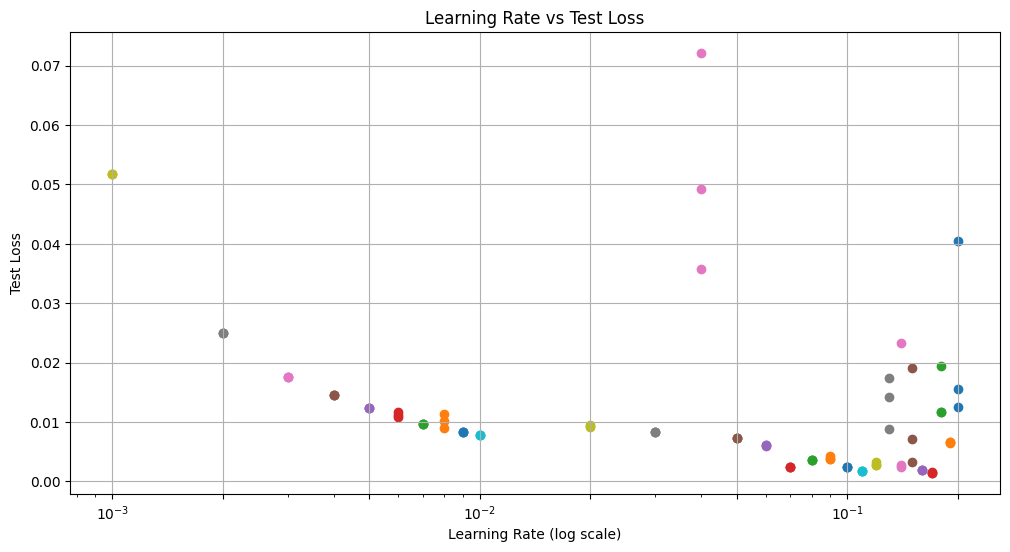


Mean test errors for different learning rates:
lr = 0.2: mean test loss = 0.02283618599176407
lr = 0.19: mean test loss = 0.006596590857952833
lr = 0.18: mean test loss = 0.014302675612270832
lr = 0.17: mean test loss = 0.001478924066759646
lr = 0.16: mean test loss = 0.0018776130164042115
lr = 0.15: mean test loss = 0.009835170581936836
lr = 0.14: mean test loss = 0.009507785551249981
lr = 0.13: mean test loss = 0.013474545441567898
lr = 0.12: mean test loss = 0.0029366612434387207
lr = 0.11: mean test loss = 0.0017557997489348054
lr = 0.1: mean test loss = 0.002443897072225809
lr = 0.09: mean test loss = 0.003926840610802174
lr = 0.08: mean test loss = 0.003692279802635312
lr = 0.07: mean test loss = 0.0023830030113458633
lr = 0.06: mean test loss = 0.006099157501012087
lr = 0.05: mean test loss = 0.007363965269178152
lr = 0.04: mean test loss = 0.05238470807671547
lr = 0.03: mean test loss = 0.008296512998640537
lr = 0.02: mean test loss = 0.009302791208028793
lr = 0.01: mean test 

In [ ]:
# Plotting learning rate vs test loss
plt.figure(figsize=(12, 6))

# Plot individual points for each trial
for lr, losses in results.items():
    plt.scatter([lr]*len(losses), losses, label=f'lr={lr}' if len(losses) == 1 else "")

# Setting the x-axis to logarithmic scale
plt.xscale('log')
plt.title('Learning Rate vs Test Loss')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test Loss')
plt.grid(True)

# Set custom ticks on the x-axis
plt.xticks([0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001])

plt.show()

# Print the mean test loss for each learning rate
print("\nMean test errors for different learning rates:")
min_lr = [0, 100]
for lr, losses in results.items():
    mean_loss = np.mean(losses)
    print(f"lr = {lr}: mean test loss = {mean_loss}")
    if mean_loss < min_lr[1]:
        min_lr[0] = lr
        min_lr[1] = mean_loss
print(f'\nMinimum mean loss {min_lr[1]} for lr = {min_lr[0]}')

Repeat the experiment with 244 steps

In [ ]:
# Define the range of learning rates to test
learning_rates = [round(0.2 - i * 0.01, 3) for i in range(20)] + [round(0.009 - i * 0.001, 3) for i in range(9)]

# Initialize a dictionary to store the results for each learning rate
results = {lr: [] for lr in learning_rates}

# Loop through each learning rate
for lr in learning_rates:
    for i in range(3):  # Test each learning rate 3 times
        # Initialize the model
        modelAdam2 = KAN(width=[2, 2, 1], grid=3, k=3)
        # Initialize modelAdam2 with training input
        modelAdam2(dataset['train_input'])
        # Train the model
        resultsAdam2 = modelAdam2.train(dataset, opt="Adam", steps=244, lr=lr)
        # Store the final test loss for this learning rate
        results[lr].append(resultsAdam2['test_loss'][-1])
        print(f"Test error {i+1} for lr = {lr} was: {resultsAdam2['test_loss'][-1]}\n")

train loss: 2.68e-02 | test loss: 5.13e-02 | reg: 6.74e+00 : 100%|█| 244/244 [00:06<00:00, 37.69it/s


Test error 1 for lr = 0.2 was: 0.05127668380737305



train loss: 4.45e-02 | test loss: 3.84e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 35.01it/s


Test error 2 for lr = 0.2 was: 0.038363274186849594



train loss: 3.87e-02 | test loss: 4.43e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 40.12it/s


Test error 3 for lr = 0.2 was: 0.04434947296977043



train loss: 9.27e-03 | test loss: 9.70e-03 | reg: 6.68e+00 : 100%|█| 244/244 [00:07<00:00, 33.33it/s


Test error 1 for lr = 0.19 was: 0.009703796356916428



train loss: 9.29e-03 | test loss: 9.68e-03 | reg: 6.68e+00 : 100%|█| 244/244 [00:06<00:00, 40.37it/s


Test error 2 for lr = 0.19 was: 0.009678146801888943



train loss: 9.28e-03 | test loss: 9.69e-03 | reg: 6.68e+00 : 100%|█| 244/244 [00:07<00:00, 32.65it/s


Test error 3 for lr = 0.19 was: 0.009685634635388851



train loss: 9.44e-03 | test loss: 1.03e-02 | reg: 6.89e+00 : 100%|█| 244/244 [00:06<00:00, 39.98it/s


Test error 1 for lr = 0.18 was: 0.010336528532207012



train loss: 9.44e-03 | test loss: 1.04e-02 | reg: 6.89e+00 : 100%|█| 244/244 [00:07<00:00, 33.29it/s


Test error 2 for lr = 0.18 was: 0.010352135635912418



train loss: 9.44e-03 | test loss: 1.04e-02 | reg: 6.89e+00 : 100%|█| 244/244 [00:06<00:00, 39.96it/s


Test error 3 for lr = 0.18 was: 0.010353331454098225



train loss: 4.36e-03 | test loss: 4.57e-03 | reg: 6.94e+00 : 100%|█| 244/244 [00:06<00:00, 36.67it/s


Test error 1 for lr = 0.17 was: 0.0045680152252316475



train loss: 4.36e-03 | test loss: 4.56e-03 | reg: 6.94e+00 : 100%|█| 244/244 [00:06<00:00, 36.20it/s


Test error 2 for lr = 0.17 was: 0.004564970266073942



train loss: 4.36e-03 | test loss: 4.56e-03 | reg: 6.94e+00 : 100%|█| 244/244 [00:06<00:00, 39.02it/s


Test error 3 for lr = 0.17 was: 0.004564662463963032



train loss: 4.51e-03 | test loss: 4.54e-03 | reg: 6.73e+00 : 100%|█| 244/244 [00:07<00:00, 33.61it/s


Test error 1 for lr = 0.16 was: 0.0045388368889689445



train loss: 4.51e-03 | test loss: 4.54e-03 | reg: 6.73e+00 : 100%|█| 244/244 [00:05<00:00, 41.13it/s


Test error 2 for lr = 0.16 was: 0.004537687636911869



train loss: 4.51e-03 | test loss: 4.54e-03 | reg: 6.73e+00 : 100%|█| 244/244 [00:07<00:00, 33.20it/s


Test error 3 for lr = 0.16 was: 0.004537484608590603



train loss: 8.71e-03 | test loss: 8.77e-03 | reg: 6.50e+00 : 100%|█| 244/244 [00:06<00:00, 40.52it/s


Test error 1 for lr = 0.15 was: 0.008773266337811947



train loss: 8.20e-03 | test loss: 9.09e-03 | reg: 6.50e+00 : 100%|█| 244/244 [00:07<00:00, 33.12it/s


Test error 2 for lr = 0.15 was: 0.00909382663667202



train loss: 6.91e-03 | test loss: 8.21e-03 | reg: 6.51e+00 : 100%|█| 244/244 [00:07<00:00, 33.02it/s


Test error 3 for lr = 0.15 was: 0.008206469006836414



train loss: 6.32e-03 | test loss: 6.40e-03 | reg: 6.74e+00 : 100%|█| 244/244 [00:07<00:00, 33.38it/s


Test error 1 for lr = 0.14 was: 0.006398462690412998



train loss: 6.05e-03 | test loss: 6.22e-03 | reg: 6.74e+00 : 100%|█| 244/244 [00:06<00:00, 40.07it/s


Test error 2 for lr = 0.14 was: 0.006219212897121906



train loss: 6.34e-03 | test loss: 6.45e-03 | reg: 6.74e+00 : 100%|█| 244/244 [00:07<00:00, 33.99it/s


Test error 3 for lr = 0.14 was: 0.006448008120059967



train loss: 1.05e-02 | test loss: 1.12e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:06<00:00, 37.14it/s


Test error 1 for lr = 0.13 was: 0.011247360147535801



train loss: 1.05e-02 | test loss: 1.13e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:08<00:00, 28.00it/s


Test error 2 for lr = 0.13 was: 0.011302076280117035



train loss: 1.05e-02 | test loss: 1.13e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:07<00:00, 33.07it/s


Test error 3 for lr = 0.13 was: 0.011252237483859062



train loss: 3.93e-03 | test loss: 2.38e-03 | reg: 6.44e+00 : 100%|█| 244/244 [00:06<00:00, 40.58it/s


Test error 1 for lr = 0.12 was: 0.0023817652836441994



train loss: 3.94e-03 | test loss: 2.39e-03 | reg: 6.44e+00 : 100%|█| 244/244 [00:07<00:00, 32.89it/s


Test error 2 for lr = 0.12 was: 0.0023877492640167475



train loss: 3.97e-03 | test loss: 2.40e-03 | reg: 6.44e+00 : 100%|█| 244/244 [00:06<00:00, 39.76it/s


Test error 3 for lr = 0.12 was: 0.002400831552222371



train loss: 3.17e-03 | test loss: 3.72e-03 | reg: 6.53e+00 : 100%|█| 244/244 [00:07<00:00, 33.06it/s


Test error 1 for lr = 0.11 was: 0.003723836038261652



train loss: 3.17e-03 | test loss: 3.72e-03 | reg: 6.53e+00 : 100%|█| 244/244 [00:06<00:00, 40.13it/s


Test error 2 for lr = 0.11 was: 0.0037237508222460747



train loss: 3.17e-03 | test loss: 3.72e-03 | reg: 6.53e+00 : 100%|█| 244/244 [00:07<00:00, 32.86it/s


Test error 3 for lr = 0.11 was: 0.0037238725926727057



train loss: 5.13e-03 | test loss: 5.84e-03 | reg: 6.51e+00 : 100%|█| 244/244 [00:06<00:00, 40.43it/s


Test error 1 for lr = 0.1 was: 0.005835525691509247



train loss: 5.14e-03 | test loss: 5.84e-03 | reg: 6.51e+00 : 100%|█| 244/244 [00:06<00:00, 35.36it/s


Test error 2 for lr = 0.1 was: 0.005835565272718668



train loss: 5.14e-03 | test loss: 5.84e-03 | reg: 6.51e+00 : 100%|█| 244/244 [00:06<00:00, 37.02it/s


Test error 3 for lr = 0.1 was: 0.005835533142089844



train loss: 1.05e-02 | test loss: 1.21e-02 | reg: 6.54e+00 : 100%|█| 244/244 [00:06<00:00, 37.36it/s


Test error 1 for lr = 0.09 was: 0.012146237306296825



train loss: 1.05e-02 | test loss: 1.21e-02 | reg: 6.54e+00 : 100%|█| 244/244 [00:06<00:00, 35.10it/s


Test error 2 for lr = 0.09 was: 0.012133513577282429



train loss: 1.04e-02 | test loss: 1.21e-02 | reg: 6.54e+00 : 100%|█| 244/244 [00:06<00:00, 40.12it/s


Test error 3 for lr = 0.09 was: 0.012112105265259743



train loss: 4.65e-03 | test loss: 5.26e-03 | reg: 6.67e+00 : 100%|█| 244/244 [00:07<00:00, 33.31it/s


Test error 1 for lr = 0.08 was: 0.005264200270175934



train loss: 4.65e-03 | test loss: 5.26e-03 | reg: 6.67e+00 : 100%|█| 244/244 [00:06<00:00, 39.79it/s


Test error 2 for lr = 0.08 was: 0.005263810977339745



train loss: 4.65e-03 | test loss: 5.26e-03 | reg: 6.67e+00 : 100%|█| 244/244 [00:07<00:00, 32.79it/s


Test error 3 for lr = 0.08 was: 0.005264649633318186



train loss: 5.40e-03 | test loss: 5.59e-03 | reg: 6.72e+00 : 100%|█| 244/244 [00:06<00:00, 39.38it/s


Test error 1 for lr = 0.07 was: 0.005586470011621714



train loss: 5.42e-03 | test loss: 5.58e-03 | reg: 6.72e+00 : 100%|█| 244/244 [00:07<00:00, 32.67it/s


Test error 2 for lr = 0.07 was: 0.005581560544669628



train loss: 5.25e-03 | test loss: 5.65e-03 | reg: 6.72e+00 : 100%|█| 244/244 [00:06<00:00, 39.90it/s


Test error 3 for lr = 0.07 was: 0.005648118443787098



train loss: 8.79e-03 | test loss: 8.89e-03 | reg: 6.78e+00 : 100%|█| 244/244 [00:06<00:00, 35.27it/s


Test error 1 for lr = 0.06 was: 0.008892921730875969



train loss: 8.81e-03 | test loss: 8.90e-03 | reg: 6.78e+00 : 100%|█| 244/244 [00:06<00:00, 37.00it/s


Test error 2 for lr = 0.06 was: 0.008895969949662685



train loss: 8.78e-03 | test loss: 8.89e-03 | reg: 6.78e+00 : 100%|█| 244/244 [00:06<00:00, 36.94it/s


Test error 3 for lr = 0.06 was: 0.008891236037015915



train loss: 1.82e-02 | test loss: 1.69e-02 | reg: 6.75e+00 : 100%|█| 244/244 [00:06<00:00, 34.98it/s


Test error 1 for lr = 0.05 was: 0.016920607537031174



train loss: 1.83e-02 | test loss: 1.71e-02 | reg: 6.75e+00 : 100%|█| 244/244 [00:07<00:00, 30.52it/s


Test error 2 for lr = 0.05 was: 0.01706099696457386



train loss: 1.83e-02 | test loss: 1.71e-02 | reg: 6.75e+00 : 100%|█| 244/244 [00:07<00:00, 34.63it/s


Test error 3 for lr = 0.05 was: 0.017060644924640656



train loss: 1.74e-02 | test loss: 1.67e-02 | reg: 6.66e+00 : 100%|█| 244/244 [00:06<00:00, 38.66it/s


Test error 1 for lr = 0.04 was: 0.016684342175722122



train loss: 1.73e-02 | test loss: 1.68e-02 | reg: 6.66e+00 : 100%|█| 244/244 [00:07<00:00, 33.83it/s


Test error 2 for lr = 0.04 was: 0.01679322123527527



train loss: 1.74e-02 | test loss: 1.67e-02 | reg: 6.66e+00 : 100%|█| 244/244 [00:06<00:00, 39.83it/s


Test error 3 for lr = 0.04 was: 0.016666360199451447



train loss: 2.41e-02 | test loss: 1.72e-02 | reg: 6.65e+00 : 100%|█| 244/244 [00:07<00:00, 32.60it/s


Test error 1 for lr = 0.03 was: 0.01721027120947838



train loss: 2.39e-02 | test loss: 1.64e-02 | reg: 6.65e+00 : 100%|█| 244/244 [00:06<00:00, 39.60it/s


Test error 2 for lr = 0.03 was: 0.016429059207439423



train loss: 2.40e-02 | test loss: 1.66e-02 | reg: 6.65e+00 : 100%|█| 244/244 [00:07<00:00, 33.07it/s


Test error 3 for lr = 0.03 was: 0.016563965007662773



train loss: 1.06e-02 | test loss: 1.13e-02 | reg: 6.67e+00 : 100%|█| 244/244 [00:06<00:00, 39.98it/s


Test error 1 for lr = 0.02 was: 0.011299144476652145



train loss: 1.06e-02 | test loss: 1.13e-02 | reg: 6.67e+00 : 100%|█| 244/244 [00:07<00:00, 34.34it/s


Test error 2 for lr = 0.02 was: 0.011288297362625599



train loss: 1.06e-02 | test loss: 1.13e-02 | reg: 6.67e+00 : 100%|█| 244/244 [00:06<00:00, 38.11it/s


Test error 3 for lr = 0.02 was: 0.011283922009170055



train loss: 1.35e-02 | test loss: 1.41e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 36.58it/s


Test error 1 for lr = 0.01 was: 0.014097490347921848



train loss: 1.35e-02 | test loss: 1.41e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 35.72it/s


Test error 2 for lr = 0.01 was: 0.01409846730530262



train loss: 1.35e-02 | test loss: 1.41e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 38.67it/s


Test error 3 for lr = 0.01 was: 0.014101835899055004



train loss: 1.48e-02 | test loss: 1.55e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:07<00:00, 33.66it/s


Test error 1 for lr = 0.009 was: 0.015485008247196674



train loss: 1.48e-02 | test loss: 1.55e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:06<00:00, 39.35it/s


Test error 2 for lr = 0.009 was: 0.01548499520868063



train loss: 1.48e-02 | test loss: 1.55e-02 | reg: 6.73e+00 : 100%|█| 244/244 [00:07<00:00, 33.00it/s


Test error 3 for lr = 0.009 was: 0.01548499334603548



train loss: 1.66e-02 | test loss: 1.73e-02 | reg: 6.72e+00 : 100%|█| 244/244 [00:06<00:00, 39.88it/s


Test error 1 for lr = 0.008 was: 0.017275040969252586



train loss: 1.66e-02 | test loss: 1.73e-02 | reg: 6.72e+00 : 100%|█| 244/244 [00:07<00:00, 32.42it/s


Test error 2 for lr = 0.008 was: 0.017275039106607437



train loss: 1.66e-02 | test loss: 1.73e-02 | reg: 6.72e+00 : 100%|█| 244/244 [00:06<00:00, 39.23it/s


Test error 3 for lr = 0.008 was: 0.01727503351867199



train loss: 1.82e-02 | test loss: 1.91e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:07<00:00, 32.39it/s


Test error 1 for lr = 0.007 was: 0.019094912335276604



train loss: 1.82e-02 | test loss: 1.91e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:06<00:00, 38.87it/s


Test error 2 for lr = 0.007 was: 0.019094927236437798



train loss: 1.82e-02 | test loss: 1.91e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:07<00:00, 34.79it/s


Test error 3 for lr = 0.007 was: 0.0190949197858572



train loss: 2.06e-02 | test loss: 2.17e-02 | reg: 6.69e+00 : 100%|█| 244/244 [00:06<00:00, 36.33it/s


Test error 1 for lr = 0.006 was: 0.021721214056015015



train loss: 2.06e-02 | test loss: 2.17e-02 | reg: 6.69e+00 : 100%|█| 244/244 [00:06<00:00, 36.89it/s


Test error 2 for lr = 0.006 was: 0.021721206605434418



train loss: 2.06e-02 | test loss: 2.17e-02 | reg: 6.69e+00 : 100%|█| 244/244 [00:07<00:00, 34.74it/s


Test error 3 for lr = 0.006 was: 0.021721215918660164



train loss: 2.43e-02 | test loss: 2.57e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:06<00:00, 39.21it/s


Test error 1 for lr = 0.005 was: 0.025707989931106567



train loss: 2.43e-02 | test loss: 2.57e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:07<00:00, 32.18it/s


Test error 2 for lr = 0.005 was: 0.025707995519042015



train loss: 2.43e-02 | test loss: 2.57e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:06<00:00, 39.19it/s


Test error 3 for lr = 0.005 was: 0.02570798061788082



train loss: 2.95e-02 | test loss: 3.14e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:08<00:00, 28.63it/s


Test error 1 for lr = 0.004 was: 0.0314316600561142



train loss: 2.95e-02 | test loss: 3.14e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:06<00:00, 35.79it/s


Test error 2 for lr = 0.004 was: 0.031431667506694794



train loss: 2.95e-02 | test loss: 3.14e-02 | reg: 6.68e+00 : 100%|█| 244/244 [00:07<00:00, 34.27it/s


Test error 3 for lr = 0.004 was: 0.03143167868256569



train loss: 3.66e-02 | test loss: 3.93e-02 | reg: 6.70e+00 : 100%|█| 244/244 [00:06<00:00, 37.05it/s


Test error 1 for lr = 0.003 was: 0.03932742029428482



train loss: 3.66e-02 | test loss: 3.93e-02 | reg: 6.70e+00 : 100%|█| 244/244 [00:06<00:00, 35.63it/s


Test error 2 for lr = 0.003 was: 0.039327412843704224



train loss: 3.66e-02 | test loss: 3.93e-02 | reg: 6.70e+00 : 100%|█| 244/244 [00:06<00:00, 35.35it/s


Test error 3 for lr = 0.003 was: 0.039327412843704224



train loss: 5.16e-02 | test loss: 5.57e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:06<00:00, 38.96it/s


Test error 1 for lr = 0.002 was: 0.055656056851148605



train loss: 5.16e-02 | test loss: 5.57e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:07<00:00, 32.64it/s


Test error 2 for lr = 0.002 was: 0.055656302720308304



train loss: 5.16e-02 | test loss: 5.57e-02 | reg: 6.71e+00 : 100%|█| 244/244 [00:06<00:00, 39.68it/s


Test error 3 for lr = 0.002 was: 0.05565617233514786



train loss: 1.64e-01 | test loss: 1.62e-01 | reg: 6.43e+00 : 100%|█| 244/244 [00:07<00:00, 32.29it/s


Test error 1 for lr = 0.001 was: 0.16207954287528992



train loss: 1.64e-01 | test loss: 1.62e-01 | reg: 6.43e+00 : 100%|█| 244/244 [00:06<00:00, 39.49it/s


Test error 2 for lr = 0.001 was: 0.1620795726776123



train loss: 1.64e-01 | test loss: 1.62e-01 | reg: 6.43e+00 : 100%|█| 244/244 [00:07<00:00, 32.82it/s

Test error 3 for lr = 0.001 was: 0.162079319357872



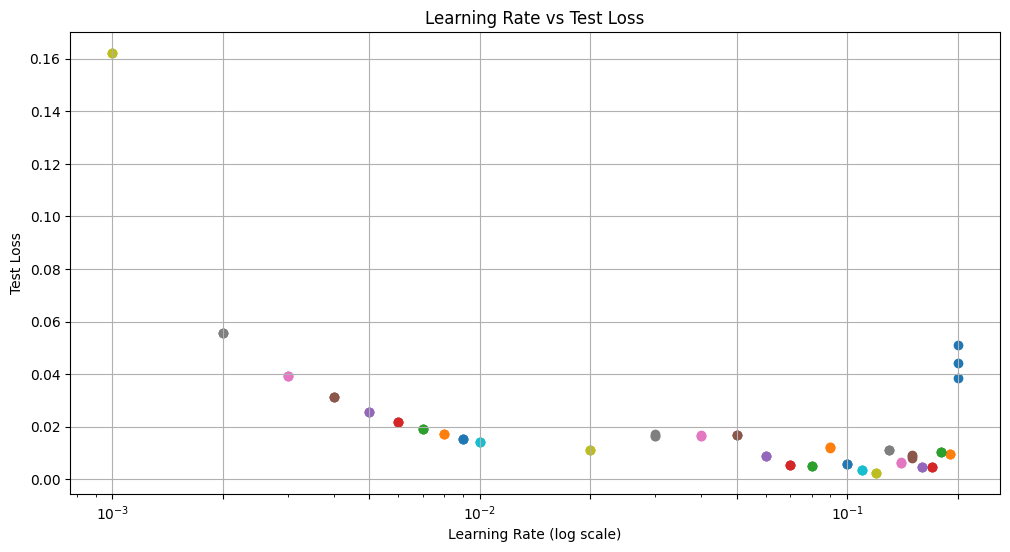


Mean test errors for different learning rates:
lr = 0.2: mean test loss = 0.04466314613819122
lr = 0.19: mean test loss = 0.009689193218946457
lr = 0.18: mean test loss = 0.010347331874072552
lr = 0.17: mean test loss = 0.004565882496535778
lr = 0.16: mean test loss = 0.004538002889603376
lr = 0.15: mean test loss = 0.008691187016665936
lr = 0.14: mean test loss = 0.006355227902531624
lr = 0.13: mean test loss = 0.011267225258052349
lr = 0.12: mean test loss = 0.002390115289017558
lr = 0.11: mean test loss = 0.0037238197401165962
lr = 0.1: mean test loss = 0.005835541058331728
lr = 0.09: mean test loss = 0.01213061809539795
lr = 0.08: mean test loss = 0.005264220293611288
lr = 0.07: mean test loss = 0.005605383310467005
lr = 0.06: mean test loss = 0.008893375284969807
lr = 0.05: mean test loss = 0.01701408438384533
lr = 0.04: mean test loss = 0.016714641824364662
lr = 0.03: mean test loss = 0.016734430566430092
lr = 0.02: mean test loss = 0.011290454305708408
lr = 0.01: mean test loss

In [ ]:
# Plotting learning rate vs test loss
plt.figure(figsize=(12, 6))

# Plot individual points for each trial
for lr, losses in results.items():
    plt.scatter([lr]*len(losses), losses, label=f'lr={lr}' if len(losses) == 1 else "")

# Setting the x-axis to logarithmic scale
plt.xscale('log')
plt.title('Learning Rate vs Test Loss')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test Loss')
plt.grid(True)

# Set custom ticks on the x-axis
plt.xticks([0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001])

plt.show()

# Print the mean test loss for each learning rate
print("\nMean test errors for different learning rates:")
min_lr = [0, 100]
for lr, losses in results.items():
    mean_loss = np.mean(losses)
    print(f"lr = {lr}: mean test loss = {mean_loss}")
    if mean_loss < min_lr[1]:
        min_lr[0] = lr
        min_lr[1] = mean_loss
print(f'\nMinimum mean loss {min_lr[1]} for lr = {min_lr[0]}')

Do other datasets behave equal? Let's try with f(x,y) = e^(sin(pi*x) + y^2)

Text(0.5, 0, 'f(X1, X2)')

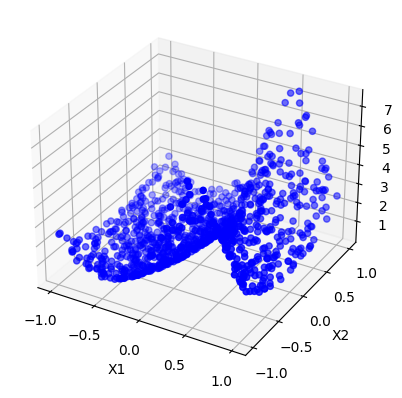

In [ ]:
# Create dataset and visualize it
f2 = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)

dataset2 = create_dataset(f2, n_var=2)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset2['train_input'][:, 0], dataset2['train_input'][:, 1], dataset2['train_label'], c='b', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

In [ ]:
# Define the range of learning rates to test
learning_rates = [round(0.2 - i * 0.01, 3) for i in range(20)] + [round(0.009 - i * 0.001, 3) for i in range(9)]

# Initialize a dictionary to store the results for each learning rate
results = {lr: [] for lr in learning_rates}

# Loop through each learning rate
for lr in learning_rates:
    for i in range(3):  # Test each learning rate 3 times
        # Initialize the model
        modelAdam2 = KAN(width=[2, 2, 1], grid=3, k=3)
        # Initialize modelAdam2 with training input
        modelAdam2(dataset2['train_input'])
        # Train the model
        resultsAdam2 = modelAdam2.train(dataset2, opt="Adam", steps=500, lr=lr)
        # Store the final test loss for this learning rate
        results[lr].append(resultsAdam2['test_loss'][-1])
        print(f"Test error {i+1} for lr = {lr} was: {resultsAdam2['test_loss'][-1]}\n")

train loss: 6.96e-02 | test loss: 7.23e-02 | reg: 8.00e+00 : 100%|█| 500/500 [00:13<00:00, 37.59it/s


Test error 1 for lr = 0.2 was: 0.07230287045240402



train loss: 2.82e-02 | test loss: 3.43e-02 | reg: 8.01e+00 : 100%|█| 500/500 [00:13<00:00, 38.28it/s


Test error 2 for lr = 0.2 was: 0.03429539501667023



train loss: 2.21e-02 | test loss: 2.57e-02 | reg: 8.02e+00 : 100%|█| 500/500 [00:13<00:00, 38.06it/s


Test error 3 for lr = 0.2 was: 0.02571980282664299



train loss: 3.71e-02 | test loss: 4.12e-02 | reg: 7.28e+00 : 100%|█| 500/500 [00:13<00:00, 38.26it/s


Test error 1 for lr = 0.19 was: 0.04124094173312187



train loss: 3.16e-02 | test loss: 3.62e-02 | reg: 7.28e+00 : 100%|█| 500/500 [00:13<00:00, 36.98it/s


Test error 2 for lr = 0.19 was: 0.03624419495463371



train loss: 3.07e-02 | test loss: 3.57e-02 | reg: 7.28e+00 : 100%|█| 500/500 [00:13<00:00, 36.96it/s


Test error 3 for lr = 0.19 was: 0.035698484629392624



train loss: 3.53e-02 | test loss: 4.21e-02 | reg: 7.29e+00 : 100%|█| 500/500 [00:13<00:00, 36.89it/s


Test error 1 for lr = 0.18 was: 0.042137473821640015



train loss: 3.31e-02 | test loss: 3.93e-02 | reg: 7.29e+00 : 100%|█| 500/500 [00:13<00:00, 37.24it/s


Test error 2 for lr = 0.18 was: 0.039280012249946594



train loss: 5.39e-02 | test loss: 7.30e-02 | reg: 7.31e+00 : 100%|█| 500/500 [00:14<00:00, 35.68it/s


Test error 3 for lr = 0.18 was: 0.07302962243556976



train loss: 2.41e-02 | test loss: 2.49e-02 | reg: 7.38e+00 : 100%|█| 500/500 [00:14<00:00, 34.41it/s


Test error 1 for lr = 0.17 was: 0.0248835738748312



train loss: 2.39e-02 | test loss: 2.46e-02 | reg: 7.37e+00 : 100%|█| 500/500 [00:13<00:00, 36.81it/s


Test error 2 for lr = 0.17 was: 0.02460404485464096



train loss: 2.38e-02 | test loss: 2.45e-02 | reg: 7.37e+00 : 100%|█| 500/500 [00:13<00:00, 36.73it/s


Test error 3 for lr = 0.17 was: 0.02451164834201336



train loss: 3.85e-02 | test loss: 3.97e-02 | reg: 7.77e+00 : 100%|█| 500/500 [00:13<00:00, 37.06it/s


Test error 1 for lr = 0.16 was: 0.03974004089832306



train loss: 5.56e-02 | test loss: 5.62e-02 | reg: 7.50e+00 : 100%|█| 500/500 [00:13<00:00, 37.81it/s


Test error 2 for lr = 0.16 was: 0.05617775022983551



train loss: 4.62e-02 | test loss: 4.84e-02 | reg: 7.58e+00 : 100%|█| 500/500 [00:13<00:00, 38.40it/s


Test error 3 for lr = 0.16 was: 0.04841082915663719



train loss: 5.65e-02 | test loss: 8.22e-02 | reg: 6.86e+00 : 100%|█| 500/500 [00:13<00:00, 37.84it/s


Test error 1 for lr = 0.15 was: 0.08223574608564377



train loss: 3.99e-02 | test loss: 3.75e-02 | reg: 6.82e+00 : 100%|█| 500/500 [00:13<00:00, 37.30it/s


Test error 2 for lr = 0.15 was: 0.03747446462512016



train loss: 2.75e-02 | test loss: 2.98e-02 | reg: 6.82e+00 : 100%|█| 500/500 [00:13<00:00, 36.78it/s


Test error 3 for lr = 0.15 was: 0.029763495549559593



train loss: 1.47e-01 | test loss: 1.38e-01 | reg: 7.02e+00 : 100%|█| 500/500 [00:13<00:00, 36.92it/s


Test error 1 for lr = 0.14 was: 0.13813428580760956



train loss: 2.44e-02 | test loss: 2.60e-02 | reg: 6.91e+00 : 100%|█| 500/500 [00:13<00:00, 36.62it/s


Test error 2 for lr = 0.14 was: 0.026032382622361183



train loss: 5.55e-02 | test loss: 5.78e-02 | reg: 6.98e+00 : 100%|█| 500/500 [00:13<00:00, 36.79it/s


Test error 3 for lr = 0.14 was: 0.057768527418375015



train loss: 5.25e-02 | test loss: 5.48e-02 | reg: 6.81e+00 : 100%|█| 500/500 [00:13<00:00, 36.89it/s


Test error 1 for lr = 0.13 was: 0.05477951094508171



train loss: 4.31e-02 | test loss: 4.47e-02 | reg: 6.96e+00 : 100%|█| 500/500 [00:13<00:00, 36.24it/s


Test error 2 for lr = 0.13 was: 0.04466886445879936



train loss: 2.12e-01 | test loss: 1.69e-01 | reg: 6.61e+00 : 100%|█| 500/500 [00:14<00:00, 34.77it/s


Test error 3 for lr = 0.13 was: 0.16887283325195312



train loss: 3.69e-02 | test loss: 3.88e-02 | reg: 8.20e+00 : 100%|█| 500/500 [00:14<00:00, 35.11it/s


Test error 1 for lr = 0.12 was: 0.03880826011300087



train loss: 8.05e-02 | test loss: 1.19e-01 | reg: 8.21e+00 : 100%|█| 500/500 [00:13<00:00, 37.98it/s


Test error 2 for lr = 0.12 was: 0.1189456358551979



train loss: 3.67e-02 | test loss: 3.86e-02 | reg: 8.19e+00 : 100%|█| 500/500 [00:13<00:00, 37.92it/s


Test error 3 for lr = 0.12 was: 0.03862003609538078



train loss: 4.00e-02 | test loss: 3.96e-02 | reg: 7.91e+00 : 100%|█| 500/500 [00:13<00:00, 38.07it/s


Test error 1 for lr = 0.11 was: 0.039552703499794006



train loss: 3.90e-02 | test loss: 3.95e-02 | reg: 7.91e+00 : 100%|█| 500/500 [00:13<00:00, 36.44it/s


Test error 2 for lr = 0.11 was: 0.03951013460755348



train loss: 4.19e-02 | test loss: 4.14e-02 | reg: 7.91e+00 : 100%|█| 500/500 [00:13<00:00, 36.51it/s


Test error 3 for lr = 0.11 was: 0.041443709284067154



train loss: 3.30e-02 | test loss: 3.52e-02 | reg: 7.65e+00 : 100%|█| 500/500 [00:13<00:00, 36.88it/s


Test error 1 for lr = 0.1 was: 0.03524594008922577



train loss: 3.30e-02 | test loss: 3.53e-02 | reg: 7.65e+00 : 100%|█| 500/500 [00:13<00:00, 36.31it/s


Test error 2 for lr = 0.1 was: 0.03525824844837189



train loss: 3.30e-02 | test loss: 3.52e-02 | reg: 7.65e+00 : 100%|█| 500/500 [00:13<00:00, 36.43it/s


Test error 3 for lr = 0.1 was: 0.03524650260806084



train loss: 4.18e-02 | test loss: 4.09e-02 | reg: 6.58e+00 : 100%|█| 500/500 [00:13<00:00, 36.21it/s


Test error 1 for lr = 0.09 was: 0.040878307074308395



train loss: 5.38e-02 | test loss: 6.00e-02 | reg: 6.59e+00 : 100%|█| 500/500 [00:13<00:00, 36.46it/s


Test error 2 for lr = 0.09 was: 0.05999588966369629



train loss: 5.76e-02 | test loss: 4.41e-02 | reg: 6.56e+00 : 100%|█| 500/500 [00:13<00:00, 36.55it/s


Test error 3 for lr = 0.09 was: 0.044137872755527496



train loss: 3.63e-02 | test loss: 4.26e-02 | reg: 6.81e+00 : 100%|█| 500/500 [00:13<00:00, 37.01it/s


Test error 1 for lr = 0.08 was: 0.04255202040076256



train loss: 3.93e-02 | test loss: 3.74e-02 | reg: 6.82e+00 : 100%|█| 500/500 [00:13<00:00, 37.79it/s


Test error 2 for lr = 0.08 was: 0.03740435466170311



train loss: 3.57e-02 | test loss: 3.66e-02 | reg: 6.82e+00 : 100%|█| 500/500 [00:15<00:00, 32.71it/s


Test error 3 for lr = 0.08 was: 0.03657887503504753



train loss: 3.24e-02 | test loss: 3.26e-02 | reg: 6.97e+00 : 100%|█| 500/500 [00:13<00:00, 37.58it/s


Test error 1 for lr = 0.07 was: 0.03263257443904877



train loss: 3.22e-02 | test loss: 3.23e-02 | reg: 6.96e+00 : 100%|█| 500/500 [00:13<00:00, 36.07it/s


Test error 2 for lr = 0.07 was: 0.03233788162469864



train loss: 3.23e-02 | test loss: 3.26e-02 | reg: 6.97e+00 : 100%|█| 500/500 [00:13<00:00, 37.12it/s


Test error 3 for lr = 0.07 was: 0.03258412703871727



train loss: 2.35e-02 | test loss: 2.27e-02 | reg: 6.85e+00 : 100%|█| 500/500 [00:13<00:00, 36.44it/s


Test error 1 for lr = 0.06 was: 0.022667143493890762



train loss: 2.37e-02 | test loss: 2.29e-02 | reg: 6.84e+00 : 100%|█| 500/500 [00:13<00:00, 36.66it/s


Test error 2 for lr = 0.06 was: 0.022890210151672363



train loss: 2.37e-02 | test loss: 2.29e-02 | reg: 6.84e+00 : 100%|█| 500/500 [00:13<00:00, 36.22it/s


Test error 3 for lr = 0.06 was: 0.022853555157780647



train loss: 2.52e-02 | test loss: 2.44e-02 | reg: 6.99e+00 : 100%|█| 500/500 [00:13<00:00, 36.22it/s


Test error 1 for lr = 0.05 was: 0.024421529844403267



train loss: 2.50e-02 | test loss: 2.40e-02 | reg: 6.99e+00 : 100%|█| 500/500 [00:13<00:00, 35.83it/s


Test error 2 for lr = 0.05 was: 0.02399752102792263



train loss: 2.49e-02 | test loss: 2.38e-02 | reg: 6.99e+00 : 100%|█| 500/500 [00:13<00:00, 36.46it/s


Test error 3 for lr = 0.05 was: 0.023800184950232506



train loss: 3.02e-02 | test loss: 3.10e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.58it/s


Test error 1 for lr = 0.04 was: 0.031025828793644905



train loss: 3.02e-02 | test loss: 3.10e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.64it/s


Test error 2 for lr = 0.04 was: 0.031025782227516174



train loss: 3.02e-02 | test loss: 3.10e-02 | reg: 6.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.03it/s


Test error 3 for lr = 0.04 was: 0.031025854870676994



train loss: 2.50e-02 | test loss: 2.39e-02 | reg: 6.93e+00 : 100%|█| 500/500 [00:13<00:00, 37.47it/s


Test error 1 for lr = 0.03 was: 0.02389400452375412



train loss: 2.50e-02 | test loss: 2.39e-02 | reg: 6.93e+00 : 100%|█| 500/500 [00:13<00:00, 36.38it/s


Test error 2 for lr = 0.03 was: 0.023893991485238075



train loss: 2.50e-02 | test loss: 2.39e-02 | reg: 6.93e+00 : 100%|█| 500/500 [00:14<00:00, 35.00it/s


Test error 3 for lr = 0.03 was: 0.023893993347883224



train loss: 4.42e-02 | test loss: 4.54e-02 | reg: 6.96e+00 : 100%|█| 500/500 [00:13<00:00, 36.28it/s


Test error 1 for lr = 0.02 was: 0.04542805999517441



train loss: 4.42e-02 | test loss: 4.54e-02 | reg: 6.96e+00 : 100%|█| 500/500 [00:13<00:00, 36.23it/s


Test error 2 for lr = 0.02 was: 0.045428287237882614



train loss: 4.42e-02 | test loss: 4.54e-02 | reg: 6.96e+00 : 100%|█| 500/500 [00:13<00:00, 36.65it/s


Test error 3 for lr = 0.02 was: 0.04542833939194679



train loss: 4.49e-02 | test loss: 4.54e-02 | reg: 7.66e+00 : 100%|█| 500/500 [00:13<00:00, 36.07it/s


Test error 1 for lr = 0.01 was: 0.0453549288213253



train loss: 4.49e-02 | test loss: 4.54e-02 | reg: 7.66e+00 : 100%|█| 500/500 [00:13<00:00, 36.55it/s


Test error 2 for lr = 0.01 was: 0.04535484313964844



train loss: 4.49e-02 | test loss: 4.54e-02 | reg: 7.66e+00 : 100%|█| 500/500 [00:13<00:00, 36.63it/s


Test error 3 for lr = 0.01 was: 0.04535482078790665



train loss: 6.41e-02 | test loss: 6.25e-02 | reg: 7.76e+00 : 100%|█| 500/500 [00:13<00:00, 36.36it/s


Test error 1 for lr = 0.009 was: 0.06254009157419205



train loss: 6.41e-02 | test loss: 6.25e-02 | reg: 7.76e+00 : 100%|█| 500/500 [00:13<00:00, 36.24it/s


Test error 2 for lr = 0.009 was: 0.06253974884748459



train loss: 6.41e-02 | test loss: 6.25e-02 | reg: 7.76e+00 : 100%|█| 500/500 [00:13<00:00, 37.72it/s


Test error 3 for lr = 0.009 was: 0.06254025548696518



train loss: 9.09e-02 | test loss: 8.95e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 37.59it/s


Test error 1 for lr = 0.008 was: 0.08947542309761047



train loss: 9.09e-02 | test loss: 8.95e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 37.09it/s


Test error 2 for lr = 0.008 was: 0.08947516232728958



train loss: 9.09e-02 | test loss: 8.95e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 36.95it/s


Test error 3 for lr = 0.008 was: 0.0894753560423851



train loss: 8.86e-02 | test loss: 8.85e-02 | reg: 7.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.44it/s


Test error 1 for lr = 0.007 was: 0.08845793455839157



train loss: 8.86e-02 | test loss: 8.85e-02 | reg: 7.71e+00 : 100%|█| 500/500 [00:15<00:00, 33.08it/s


Test error 2 for lr = 0.007 was: 0.0884595587849617



train loss: 8.86e-02 | test loss: 8.85e-02 | reg: 7.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.55it/s


Test error 3 for lr = 0.007 was: 0.08845625817775726



train loss: 9.85e-02 | test loss: 9.86e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 36.15it/s


Test error 1 for lr = 0.006 was: 0.09862468391656876



train loss: 9.85e-02 | test loss: 9.86e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 36.26it/s


Test error 2 for lr = 0.006 was: 0.09862471371889114



train loss: 9.85e-02 | test loss: 9.86e-02 | reg: 7.70e+00 : 100%|█| 500/500 [00:13<00:00, 35.81it/s


Test error 3 for lr = 0.006 was: 0.09862467646598816



train loss: 1.02e-01 | test loss: 1.03e-01 | reg: 7.73e+00 : 100%|█| 500/500 [00:13<00:00, 35.87it/s


Test error 1 for lr = 0.005 was: 0.10290167480707169



train loss: 1.02e-01 | test loss: 1.03e-01 | reg: 7.73e+00 : 100%|█| 500/500 [00:13<00:00, 36.61it/s


Test error 2 for lr = 0.005 was: 0.102901890873909



train loss: 1.02e-01 | test loss: 1.03e-01 | reg: 7.73e+00 : 100%|█| 500/500 [00:13<00:00, 35.95it/s


Test error 3 for lr = 0.005 was: 0.10290174931287766



train loss: 1.26e-01 | test loss: 1.26e-01 | reg: 7.75e+00 : 100%|█| 500/500 [00:13<00:00, 36.61it/s


Test error 1 for lr = 0.004 was: 0.1264670193195343



train loss: 1.26e-01 | test loss: 1.26e-01 | reg: 7.75e+00 : 100%|█| 500/500 [00:13<00:00, 37.18it/s


Test error 2 for lr = 0.004 was: 0.12646697461605072



train loss: 1.26e-01 | test loss: 1.26e-01 | reg: 7.75e+00 : 100%|█| 500/500 [00:13<00:00, 37.16it/s


Test error 3 for lr = 0.004 was: 0.1264670342206955



train loss: 1.52e-01 | test loss: 1.56e-01 | reg: 7.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.81it/s


Test error 1 for lr = 0.003 was: 0.15627336502075195



train loss: 1.52e-01 | test loss: 1.56e-01 | reg: 7.71e+00 : 100%|█| 500/500 [00:14<00:00, 35.64it/s


Test error 2 for lr = 0.003 was: 0.15627332031726837



train loss: 1.52e-01 | test loss: 1.56e-01 | reg: 7.71e+00 : 100%|█| 500/500 [00:13<00:00, 36.51it/s


Test error 3 for lr = 0.003 was: 0.1562734991312027



train loss: 3.30e-01 | test loss: 3.37e-01 | reg: 7.65e+00 : 100%|█| 500/500 [00:13<00:00, 36.52it/s


Test error 1 for lr = 0.002 was: 0.3366418480873108



train loss: 3.30e-01 | test loss: 3.37e-01 | reg: 7.65e+00 : 100%|█| 500/500 [00:15<00:00, 31.82it/s


Test error 2 for lr = 0.002 was: 0.3366418182849884



train loss: 3.30e-01 | test loss: 3.37e-01 | reg: 7.65e+00 : 100%|█| 500/500 [00:13<00:00, 36.24it/s


Test error 3 for lr = 0.002 was: 0.3366416394710541



train loss: 8.29e-01 | test loss: 8.68e-01 | reg: 7.95e+00 : 100%|█| 500/500 [00:13<00:00, 35.92it/s


Test error 1 for lr = 0.001 was: 0.8683735132217407



train loss: 8.29e-01 | test loss: 8.68e-01 | reg: 7.95e+00 : 100%|█| 500/500 [00:13<00:00, 36.04it/s


Test error 2 for lr = 0.001 was: 0.8683736324310303



train loss: 8.29e-01 | test loss: 8.68e-01 | reg: 7.95e+00 : 100%|█| 500/500 [00:13<00:00, 35.81it/s

Test error 3 for lr = 0.001 was: 0.8683735728263855



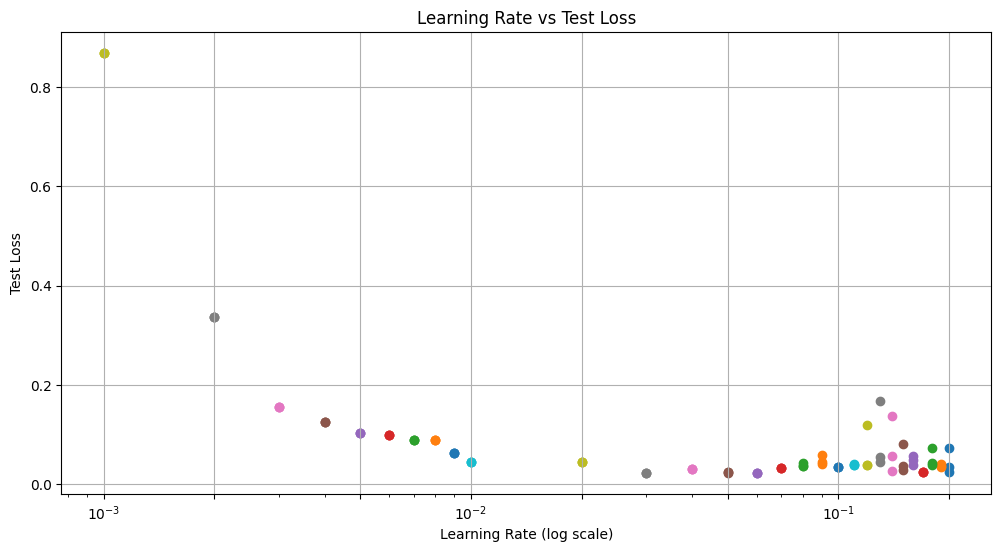


Mean test errors for different learning rates:
lr = 0.2: mean test loss = 0.04410602152347565
lr = 0.19: mean test loss = 0.037727873772382736
lr = 0.18: mean test loss = 0.051482368260622025
lr = 0.17: mean test loss = 0.024666422978043556
lr = 0.16: mean test loss = 0.048109542578458786
lr = 0.15: mean test loss = 0.04982456564903259
lr = 0.14: mean test loss = 0.07397840172052383
lr = 0.13: mean test loss = 0.08944040536880493
lr = 0.12: mean test loss = 0.06545797735452652
lr = 0.11: mean test loss = 0.040168847888708115
lr = 0.1: mean test loss = 0.0352502316236496
lr = 0.09: mean test loss = 0.048337358981370926
lr = 0.08: mean test loss = 0.03884508088231087
lr = 0.07: mean test loss = 0.03251819312572479
lr = 0.06: mean test loss = 0.022803636267781258
lr = 0.05: mean test loss = 0.024073079228401184
lr = 0.04: mean test loss = 0.031025821343064308
lr = 0.03: mean test loss = 0.023893997073173523
lr = 0.02: mean test loss = 0.04542822763323784
lr = 0.01: mean test loss = 0.045

In [ ]:
# Plotting learning rate vs test loss
plt.figure(figsize=(12, 6))

# Plot individual points for each trial
for lr, losses in results.items():
    plt.scatter([lr]*len(losses), losses, label=f'lr={lr}' if len(losses) == 1 else "")

# Setting the x-axis to logarithmic scale
plt.xscale('log')
plt.title('Learning Rate vs Test Loss')
plt.xlabel('Learning Rate (log scale)')
plt.ylabel('Test Loss')
plt.grid(True)

# Set custom ticks on the x-axis
plt.xticks([0.2, 0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001])

plt.show()

# Print the mean test loss for each learning rate
print("\nMean test errors for different learning rates:")
min_lr = [0, 100]
for lr, losses in results.items():
    mean_loss = np.mean(losses)
    print(f"lr = {lr}: mean test loss = {mean_loss}")
    if mean_loss < min_lr[1]:
        min_lr[0] = lr
        min_lr[1] = mean_loss
print(f'\nMinimum mean loss {min_lr[1]} for lr = {min_lr[0]}')

Initialization with grid = 3


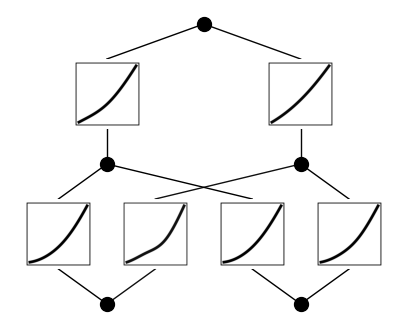

In [ ]:
# Initialize a more fine-grained KAN with G=10
modelAdam = KAN(width=[2,2,1], grid=3, k=3)
# Initialize model2 from model

# Plot KAN with grid = 3 at initialization
modelAdam(dataset['train_input'])
print("Initialization with grid = 3")
modelAdam.plot(beta=100)

train loss: 3.94e-03 | test loss: 2.39e-03 | reg: 6.44e+00 : 100%|█| 244/244 [00:05<00:00, 41.05it/s



Total Training time: 5.953057765960693 seconds


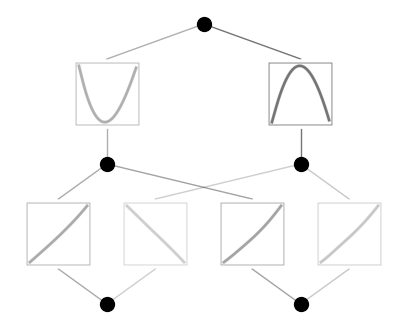

In [ ]:
# Considering that reduction in time was 12.207x, would a KAN trained in 244
# steps be able to get the same or less RMSE than one trained through LBFGS?
start_time = time.time()  # Start the timer
resultsAdam = modelAdam.train(dataset, opt="Adam", steps=244, lr=0.12);
end_time = time.time()  # End the timer
print(f"\nTotal Training time: {end_time-start_time} seconds")
modelAdam.plot()

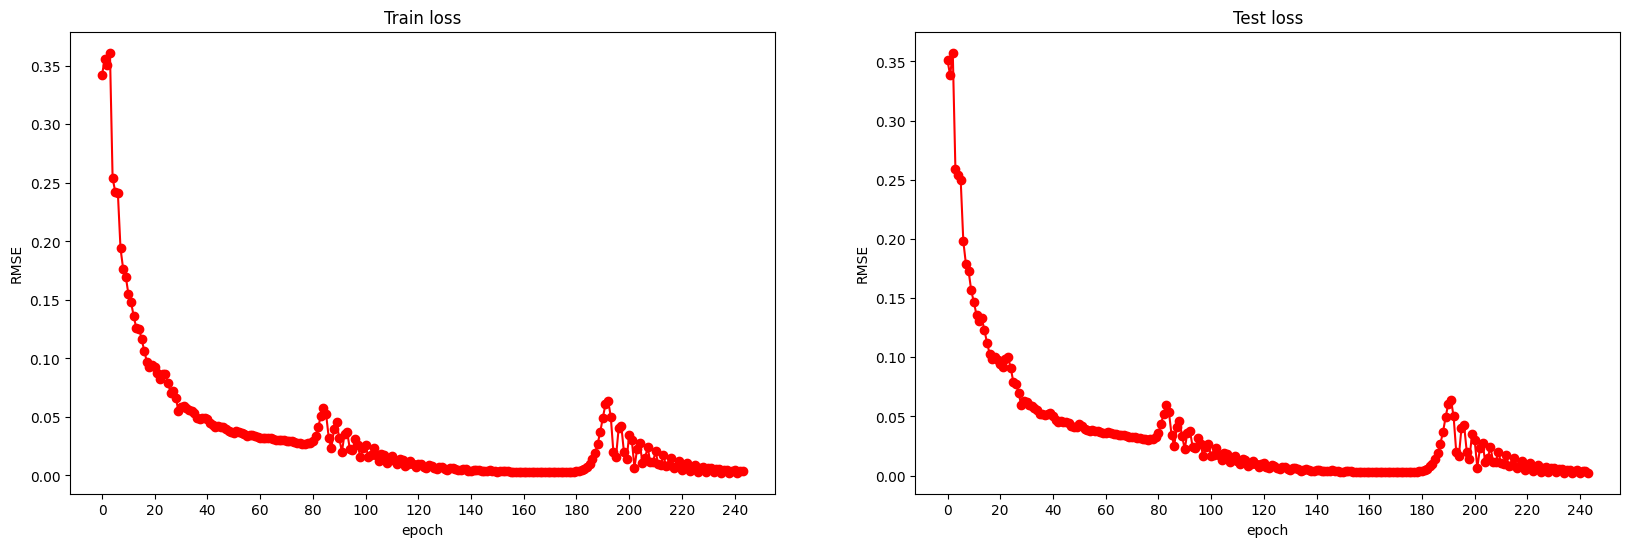

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Generate losses plots
plot_2d(axes[0], resultsAdam['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE', show_grid=False, step_size=20)
plot_2d(axes[1], resultsAdam['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE', show_grid=False, step_size=20)

Applying grid extension for an Adam trained network

In [ ]:
# We will use grids of sizes:
grids = np.array([5,10,20,50,100])

train_losses = []
test_losses = []
steps = 244
k = 3 # Degree of B-splines involved
n_params = []
lr = [0.12, 0.1, 0.07, 0.05, 0.01]

# Iterate through all grid sizes while training the same [2,2,1] KAN
start_time = time.time()  # Start the timer

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k)
    if i != 0:
        model = KAN(width=[2,2,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    results = model.train(dataset, opt="Adam", steps=steps, lr=0.12, stop_grid_update_step=30)
    train_losses += results['train_loss']
    test_losses += results['test_loss']

end_time = time.time()  # End the timer
#print(f"\nTotal Training time: {end_time-start_time} seconds")

train loss: 1.26e-02 | test loss: 1.32e-02 | reg: 6.79e+00 : 100%|█| 244/244 [00:07<00:00, 34.46it/s
train loss: 7.46e-03 | test loss: 9.20e-03 | reg: 5.69e+00 : 100%|█| 244/244 [00:07<00:00, 34.21it/s
train loss: 6.11e-03 | test loss: 6.66e-03 | reg: 5.90e+00 : 100%|█| 244/244 [00:08<00:00, 29.52it/s
train loss: 6.16e-02 | test loss: 1.00e-01 | reg: 5.92e+00 : 100%|█| 244/244 [00:11<00:00, 21.32it/s
train loss: 4.14e-02 | test loss: 7.56e-02 | reg: 6.83e+00 : 100%|█| 244/244 [00:16<00:00, 15.22it/s


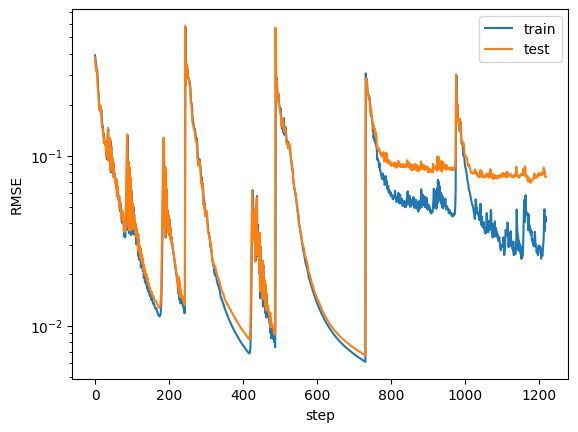

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

### TEST 2: UNKNOWN FUNCTION

f(x,y)=2^(cos^(2)(x) sin^(2)(y))

Text(0.5, 0, 'f(X1, X2)')

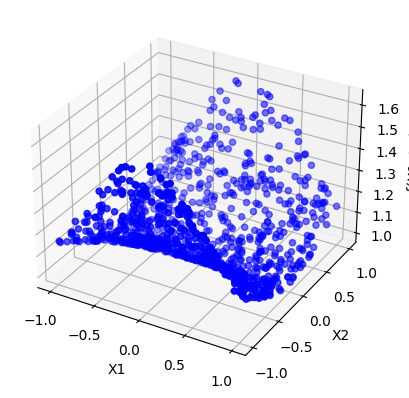

In [ ]:
# create dataset and visualize it
f = lambda x: 2**(torch.cos(x[:,[0]])**2 * torch.sin(x[:,[1]])**2)
dataset = create_dataset(f, n_var=2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['train_input'][:, 0], dataset['train_input'][:, 1], dataset['train_label'], c='b', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

TRAIN KAN (grid = 3)


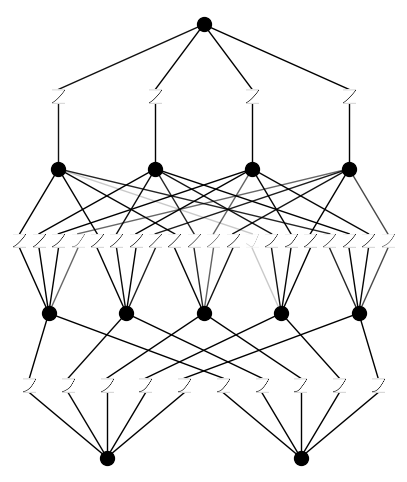

In [ ]:
# TRAIN KAN (grid = 3)

# initialize KAN with G=3
model = KAN(width=[2, 5, 4, 1], grid=3, k=3)

# create dataset
f = lambda x: 2**(torch.cos(x[:,[0]])**2 * torch.sin(x[:,[1]])**2)
dataset = create_dataset(f, n_var=2)

# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

train loss: 6.94e-04 | test loss: 8.22e-04 | reg: 2.48e+01 : 100%|██| 20/20 [00:20<00:00,  1.04s/it]


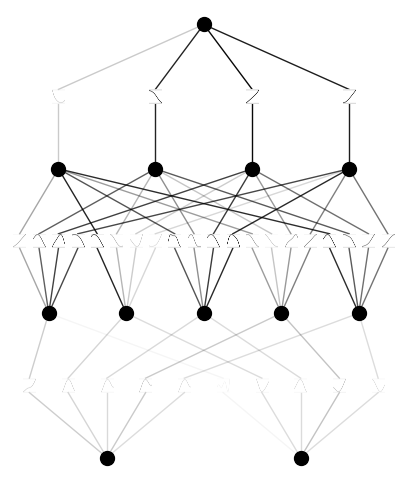

In [ ]:
# Train and plot the model after training
results = model.train(dataset, opt="LBFGS", steps=20);
model.plot()

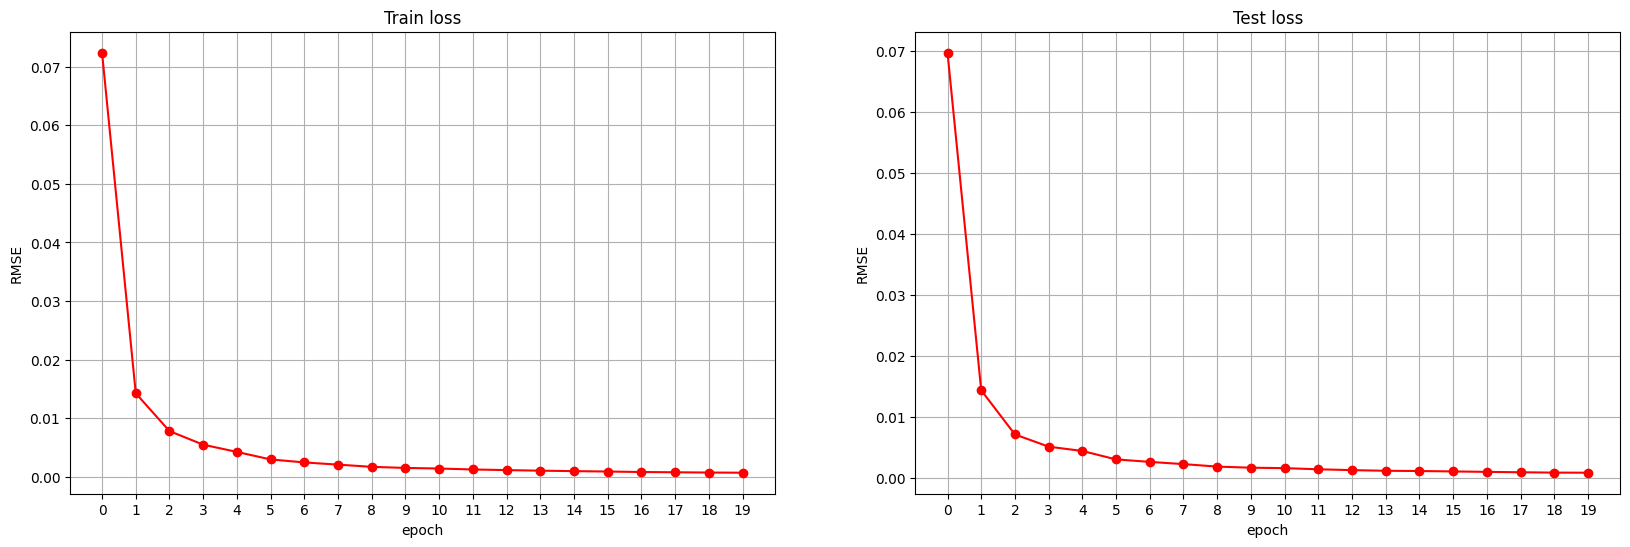

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_2d(axes[0], results['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE')
plot_2d(axes[1], results['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE')

Visualizing results

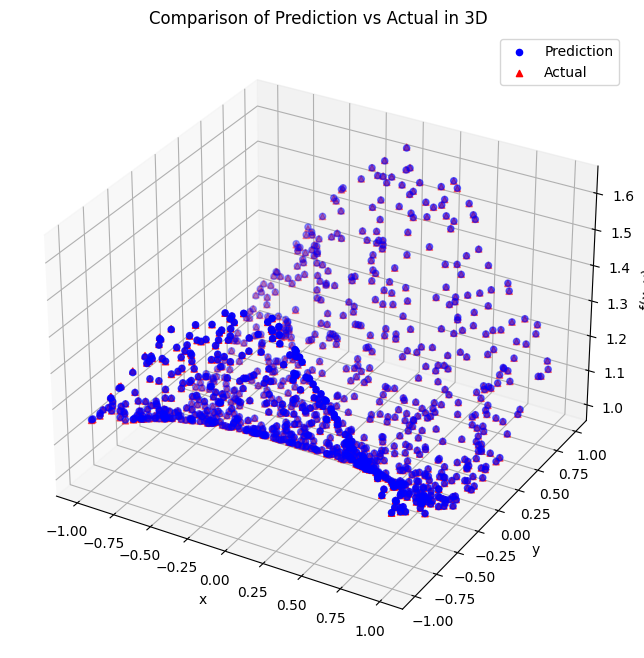

In [ ]:
# Perform a forward pass to get predictions
predicted = model(dataset['test_input'])
# Plot comparison of predicted vs real function values for created input
ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'], xlabel='x', ylabel='y', zlabel='f(x, y)')

Refining the grid

Re-train with grid = 10

Initialization with grid = 10, pretrained with grid = 3


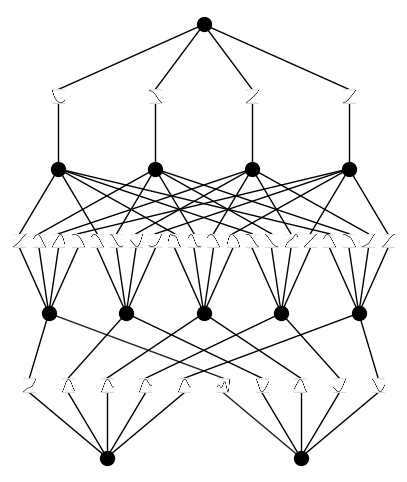

In [ ]:
# initialize a more fine-grained KAN with G=10
model2 = KAN(width=[2,5,4,1], grid=10, k=3)
# initialize model2 from model
model2.initialize_from_another_model(model, dataset['train_input']);

# Plot KAN with grid = 10 at initialization
model2(dataset['train_input'])
print("Initialization with grid = 10, pretrained with grid = 3")
model2.plot(beta=100)

train loss: 8.40e-05 | test loss: 1.21e-04 | reg: 2.49e+01 : 100%|██| 20/20 [00:26<00:00,  1.31s/it]


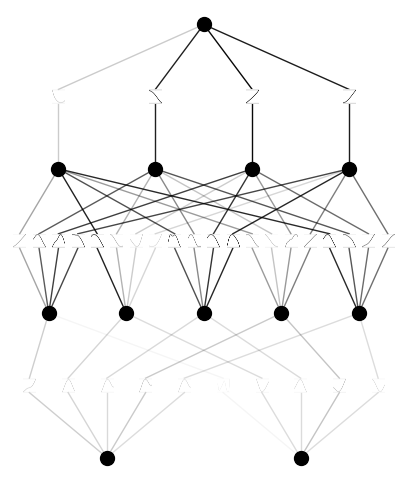

In [ ]:
# Train
results2 = model2.train(dataset, opt="LBFGS", steps=20);
model2.plot()

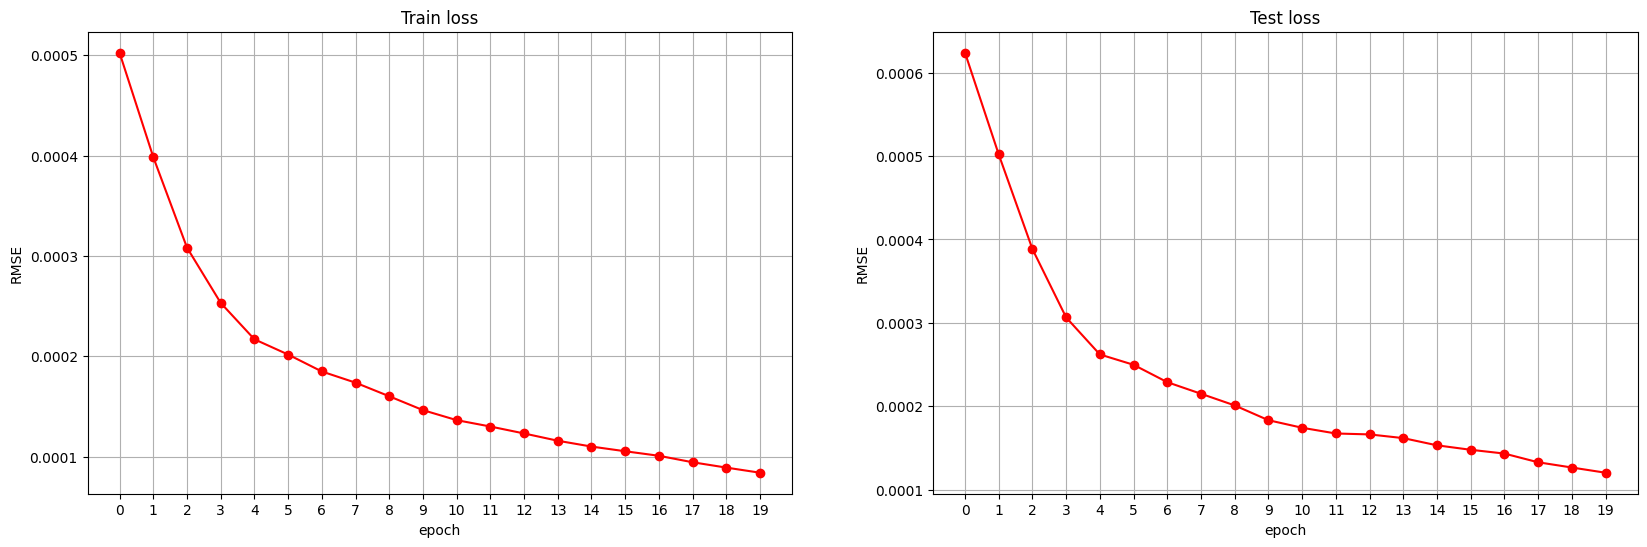

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Generate losses plots
plot_2d(axes[0], results2['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE')
plot_2d(axes[1], results2['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE')

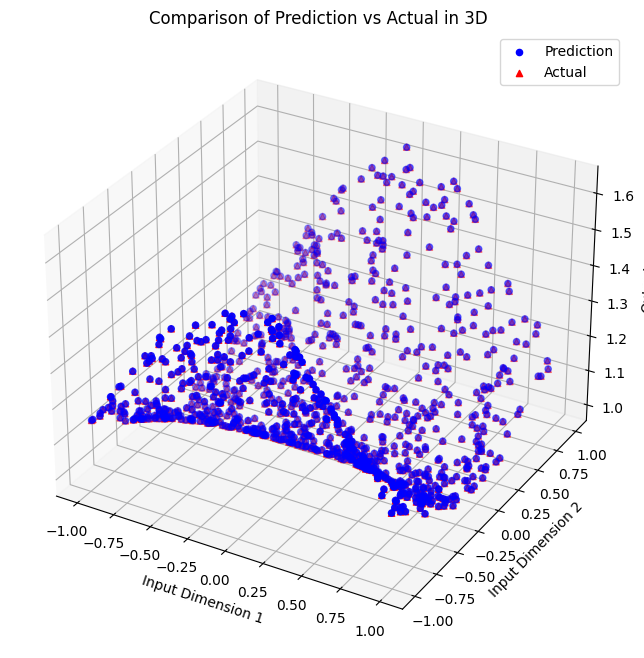

In [ ]:
# Perform a forward pass to get predictions
predicted = model2(dataset['test_input'])
# Plot comparison of predicted vs real function values for created input
ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'])

In [ ]:
# We will use grids of sizes:
grids = np.array([25,50,75,100])

train_losses = []
test_losses = []
steps = 50
k = 3 # Degree of B-splines involved
n_params = []

# Iterate through all grid sizes while training the same [2,5,4,1] KAN
for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[2,5,4,1], grid=grids[i], k=k).initialize_from_another_model(model2, dataset['train_input'])
    if i != 0:
        model = KAN(width=[2,5,4,1], grid=grids[i], k=k).initialize_from_another_model(model, dataset['train_input'])
    n_params.append([number_parameters(model)])
    print(f"Number of parameters for grid size {grids[i]}: {number_parameters(model)}")
    #results = model.train(dataset, opt="LBFGS", steps=steps, stop_grid_update_step=30) # Train initialized model with according grid size
    # Concat train and test losses
    train_losses += results['train_loss']
    test_losses += results['test_loss']

Number of parameters for grid size 25: 952
Number of parameters for grid size 50: 1802
Number of parameters for grid size 75: 2652
Number of parameters for grid size 100: 3502


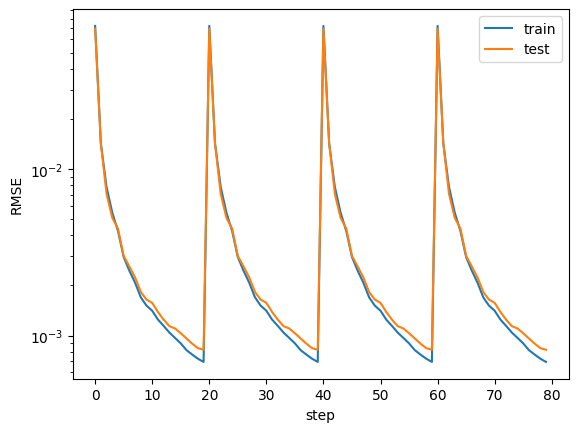

In [ ]:
plt.plot(train_losses)
plt.plot(test_losses)
plt.legend(['train', 'test'])
plt.ylabel('RMSE')
plt.xlabel('step')
plt.yscale('log')

Now we will try different architectures and see the ones that give better results for fixed grid=10 and k=3.

In [ ]:
widths = [[2, 4, 2, 1], [2,1,2,1], [2,6,1,2,3,1,3,1], [2,7,1], [2,5,5,5,1]]
#steps =[20, 50, 100, 200]
models = []
results = []
# We will try different architectures for grid = 10 and k = 3
for i in widths:
    print(f'Kan Architecture {i}')

    model = KAN(width=i, grid=10, k=3)
    model(dataset['train_input']);

    print('The number of parameters of this architecture is:', number_parameters(model))

    start_time = time.time()  # Start the timer
    result = model.train(dataset, opt="LBFGS", steps=10);
    end_time = time.time()  # End the timer

    print(f"Total Training time: {end_time-start_time} seconds\n")

    results.append(result)
    models.append(model)


Kan Architecture [2, 4, 2, 1]
The number of parameters of this architecture is: 234


train loss: 1.46e-03 | test loss: 1.78e-03 | reg: 1.55e+01 : 100%|██| 10/10 [00:07<00:00,  1.31it/s]


Total Training time: 7.65019416809082 seconds

Kan Architecture [2, 1, 2, 1]
The number of parameters of this architecture is: 78


train loss: 7.66e-02 | test loss: 8.96e-02 | reg: 6.60e+00 : 100%|██| 10/10 [00:05<00:00,  1.74it/s]


Total Training time: 5.75793194770813 seconds

Kan Architecture [2, 6, 1, 2, 3, 1, 3, 1]
The number of parameters of this architecture is: 455


train loss: 2.57e-02 | test loss: 3.24e-02 | reg: 3.21e+01 : 100%|██| 10/10 [00:17<00:00,  1.74s/it]


Total Training time: 17.449403047561646 seconds

Kan Architecture [2, 7, 1]
The number of parameters of this architecture is: 273


train loss: 7.92e-04 | test loss: 9.17e-04 | reg: 1.42e+01 : 100%|██| 10/10 [00:06<00:00,  1.51it/s]


Total Training time: 6.61504340171814 seconds

Kan Architecture [2, 5, 5, 5, 1]
The number of parameters of this architecture is: 845


train loss: 1.55e-03 | test loss: 1.01e-02 | reg: 3.42e+01 : 100%|██| 10/10 [00:23<00:00,  2.36s/it]

Total Training time: 23.581371307373047 seconds



### Pruning networks

Now we will create models with different architectures and prune them to see the results.

In [ ]:
#f = lambda x: 2**(((x[:,[0]])**2)*x[:,[1]])
f = lambda x: 2**(torch.cos(x[:,[0]])**2 * torch.sin(x[:,[1]])**2)
dataset = create_dataset(f, n_var=2)

Text(0.5, 0, 'f(X1, X2)')

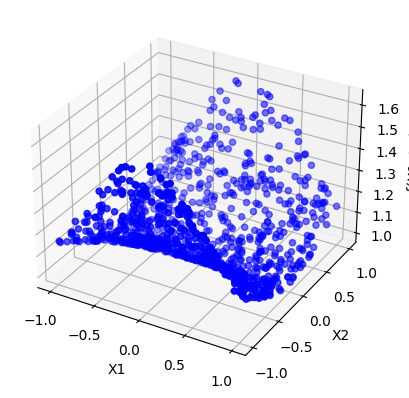

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataset['train_input'][:, 0], dataset['train_input'][:, 1], dataset['train_label'], c='b', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')

In [ ]:
widths = [[2, 4, 4, 1], [2, 10, 5, 1], [2,2,1], [2,7,1]]
#steps =[20, 50, 100, 200]
models = []
results = []
# We will try different architectures for grid = 10 and k = 3
for i in widths:
    print(f'Kan Architecture {i}')

    model = KAN(width=i, grid=10, k=3)
    model(dataset['train_input']);

    print('The number of parameters of this architecture is:', number_parameters(model))

    start_time = time.time()  # Start the timer
    result = model.train(dataset, opt="LBFGS", steps=100);
    end_time = time.time()  # End the timer

    print(f"Total Training time: {end_time-start_time} seconds\n")

    results.append(result)
    models.append(model)

Kan Architecture [2, 4, 4, 1]
The number of parameters of this architecture is: 364


train loss: 1.17e-04 | test loss: 2.04e-04 | reg: 1.84e+01 : 100%|█| 100/100 [01:52<00:00,  1.12s/it


Total Training time: 112.27817106246948 seconds

Kan Architecture [2, 10, 5, 1]
The number of parameters of this architecture is: 975


train loss: 6.07e-05 | test loss: 1.79e-04 | reg: 2.71e+01 : 100%|█| 100/100 [04:10<00:00,  2.50s/it


Total Training time: 250.35303020477295 seconds

Kan Architecture [2, 2, 1]
The number of parameters of this architecture is: 78


train loss: 1.82e-03 | test loss: 1.90e-03 | reg: 7.97e+00 : 100%|█| 100/100 [00:37<00:00,  2.64it/s


Total Training time: 37.94041204452515 seconds

Kan Architecture [2, 7, 1]
The number of parameters of this architecture is: 273


train loss: 9.76e-05 | test loss: 1.73e-04 | reg: 1.42e+01 : 100%|█| 100/100 [01:12<00:00,  1.38it/s

Total Training time: 72.66056323051453 seconds



In [ ]:
# For saving the before pruning state of the models
for i in range(len(models)):
    models[i].save_ckpt(f'b_before_pruning_model{i}')

save this model to ./model_ckpt/b_before_pruning_model0
save this model to ./model_ckpt/b_before_pruning_model1
save this model to ./model_ckpt/b_before_pruning_model2
save this model to ./model_ckpt/b_before_pruning_model3


In [ ]:
# For loading the before pruning state of the models
for i in range(len(models)):
    models[i].load_ckpt(f'b_before_pruning_model{i}')
    models[i](dataset['train_input'])

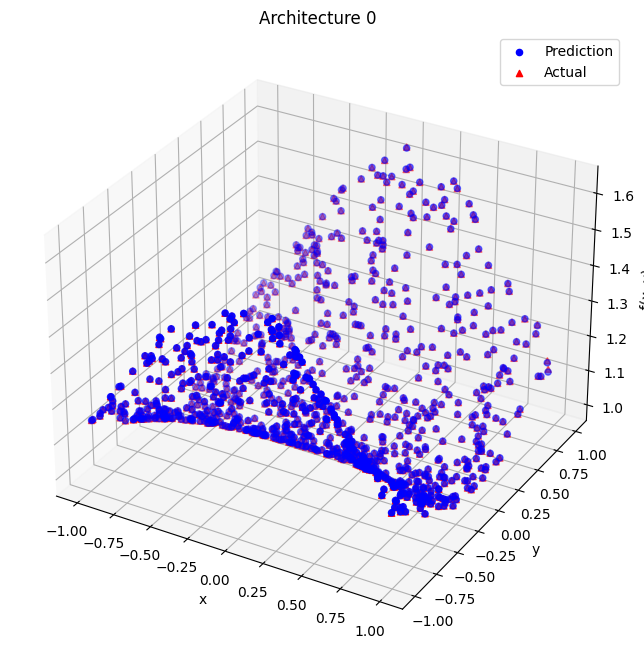

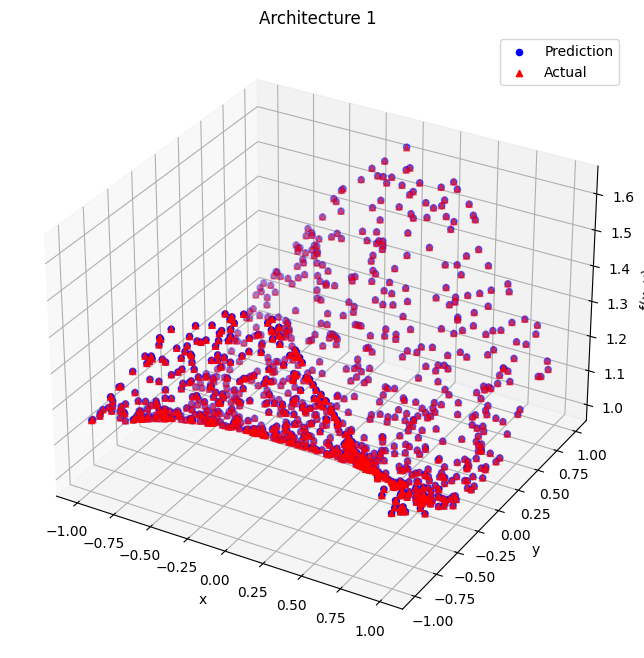

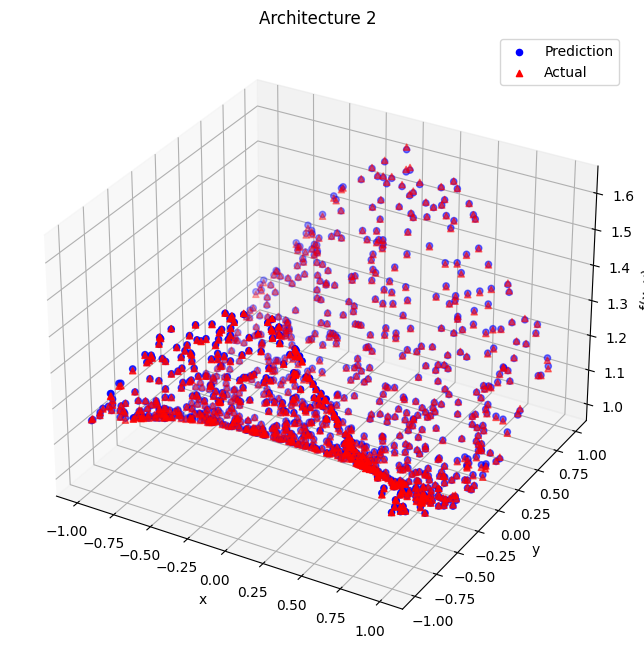

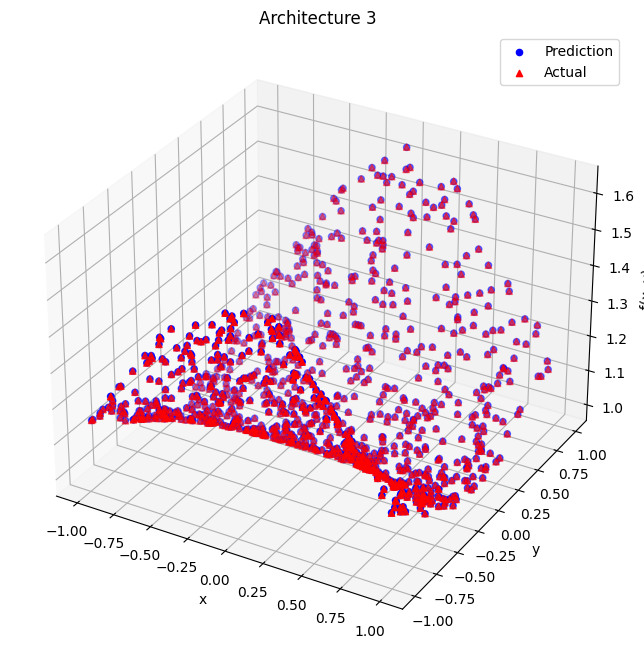

In [ ]:
for i in range(len(models)):
    # Perform a forward pass to get predictions
    predicted = models[i](dataset['test_input'])
    # Plot comparison of predicted vs real function values for created input
    ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'], title=f'Architecture {i}',xlabel='x', ylabel='y', zlabel='f(x, y)')

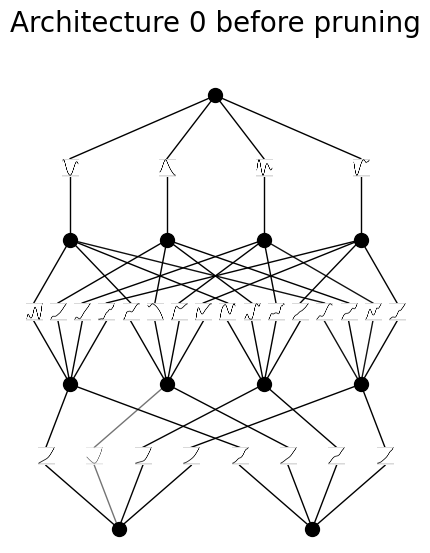

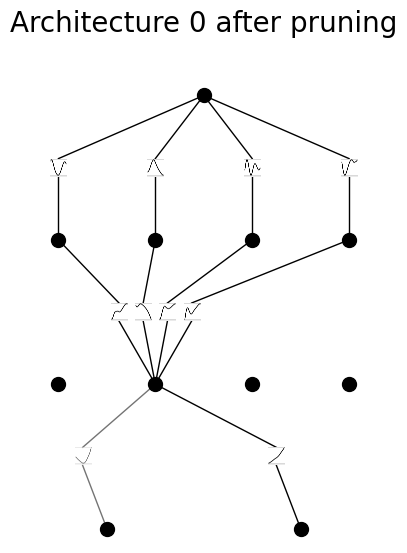

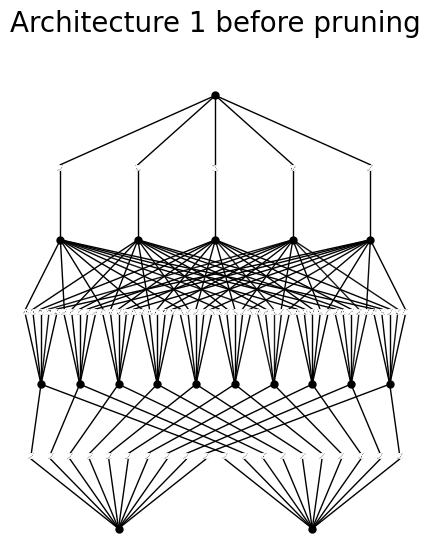

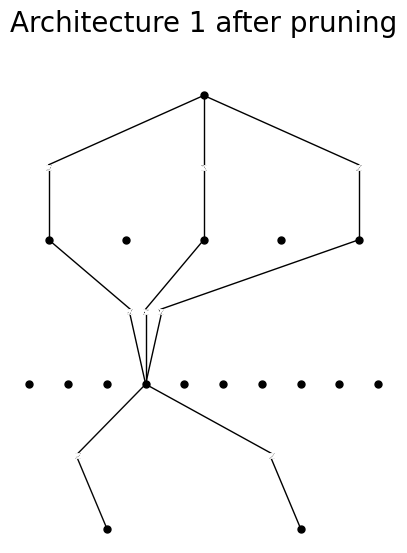

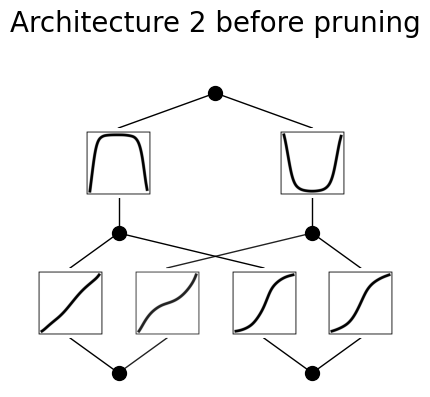

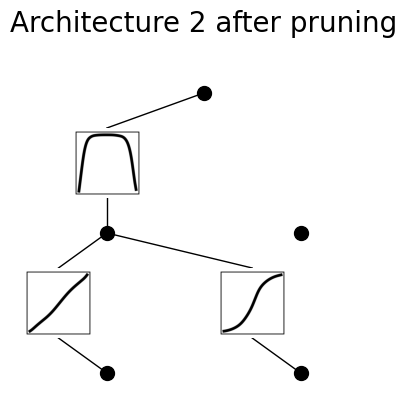

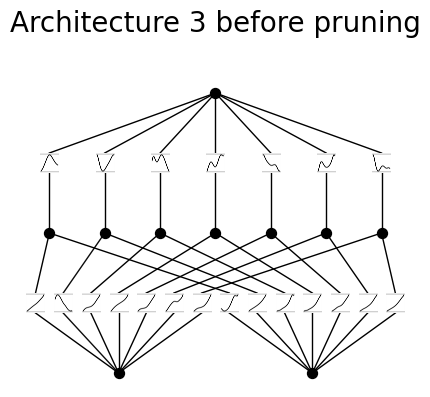

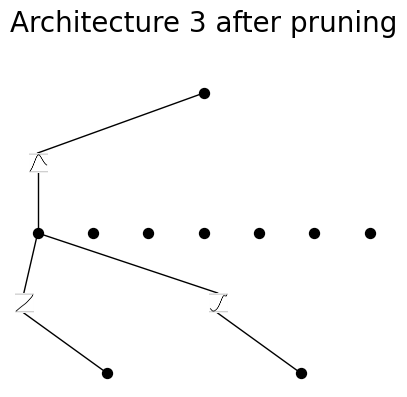

In [ ]:
# We will prune the trained models
thresholds = [0.0625, 0.0725, 0.0925, 0.0925]
for i in range(len(models)):
    models[i].plot(beta=100, title=f'Architecture {i} before pruning')
    models[i].prune(threshold=thresholds[i])
    models[i].plot(beta=100, title=f'Architecture {i} after pruning',  mask=True)


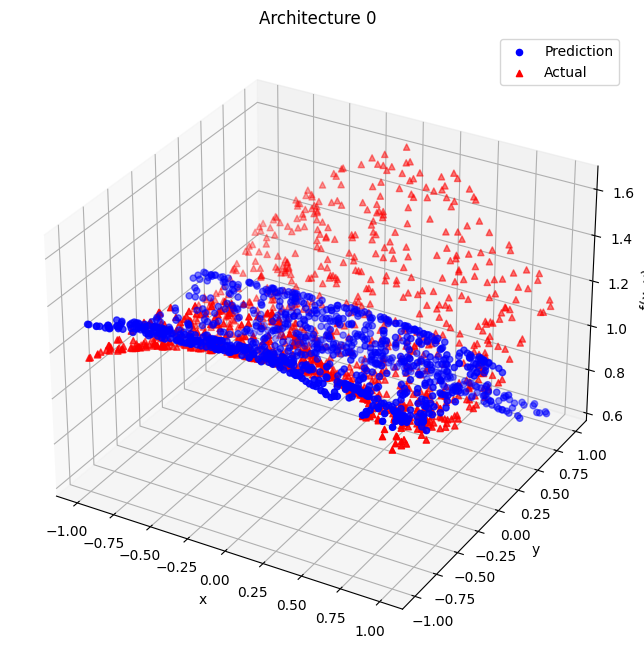

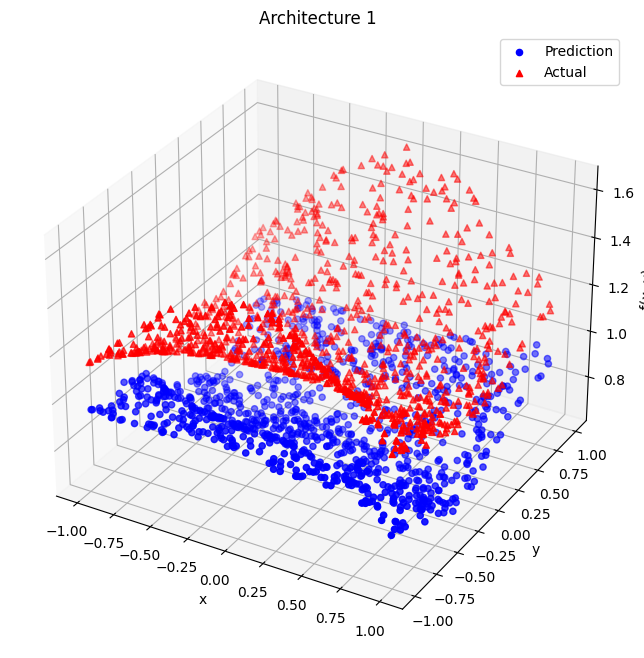

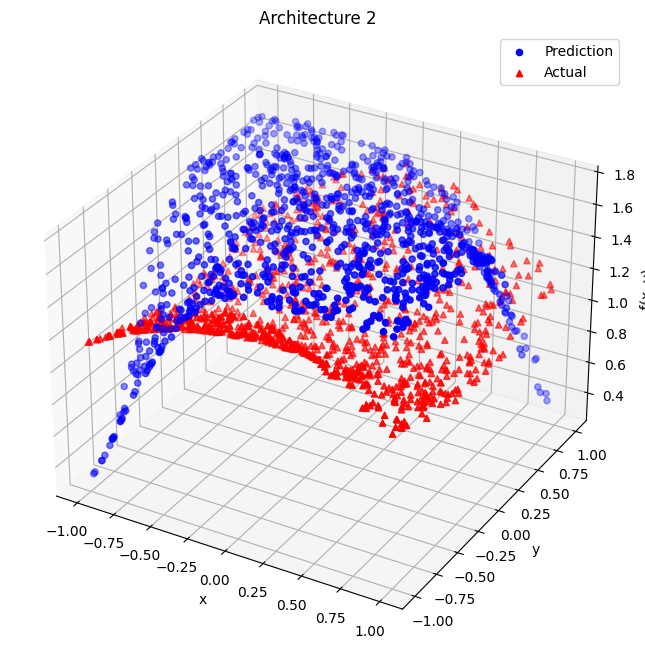

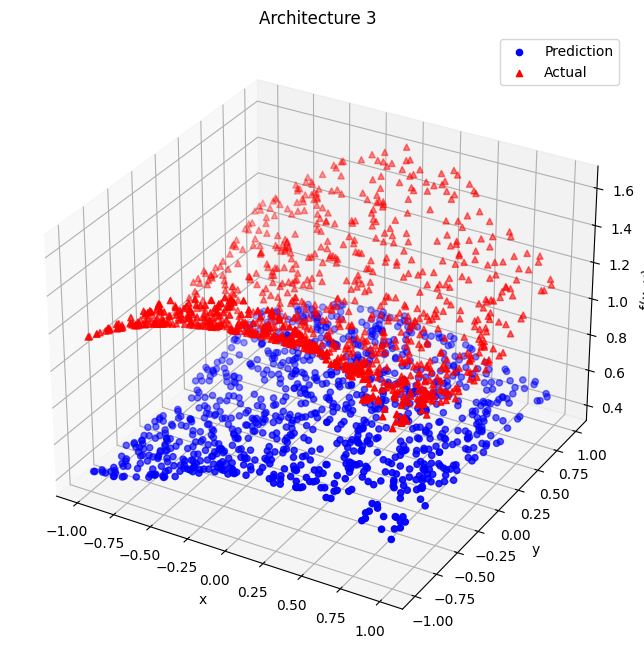

In [ ]:
for i in range(len(models)):
    # Perform a forward pass to get predictions
    predicted = models[i](dataset['test_input'])
    # Plot comparison of predicted vs real function values for created input
    ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'], title=f'Architecture {i}',xlabel='x', ylabel='y', zlabel='f(x, y)')

train loss: 6.31e-02 | test loss: 6.99e-02 | reg: 2.32e+00 : 100%|█| 100/100 [01:13<00:00,  1.36it/s


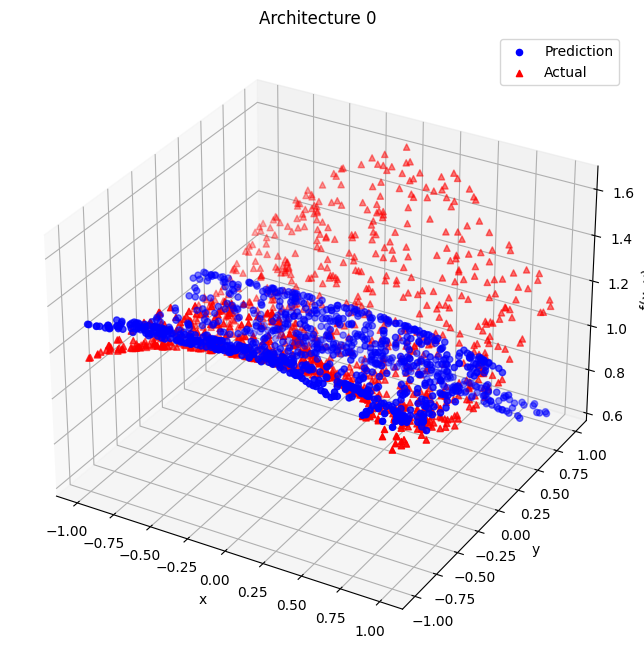

train loss: 6.53e-02 | test loss: 7.13e-02 | reg: 2.33e+00 : 100%|█| 100/100 [01:13<00:00,  1.35it/s


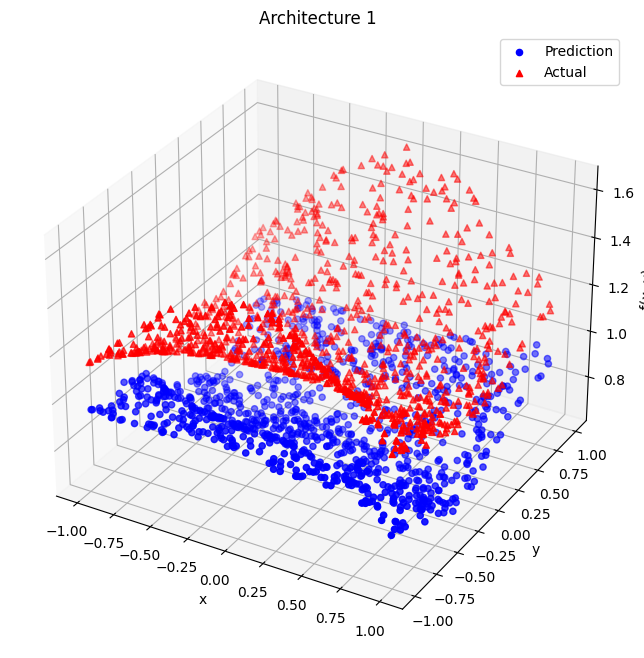

train loss: 6.49e-02 | test loss: 7.13e-02 | reg: 2.32e+00 : 100%|█| 100/100 [01:04<00:00,  1.54it/s


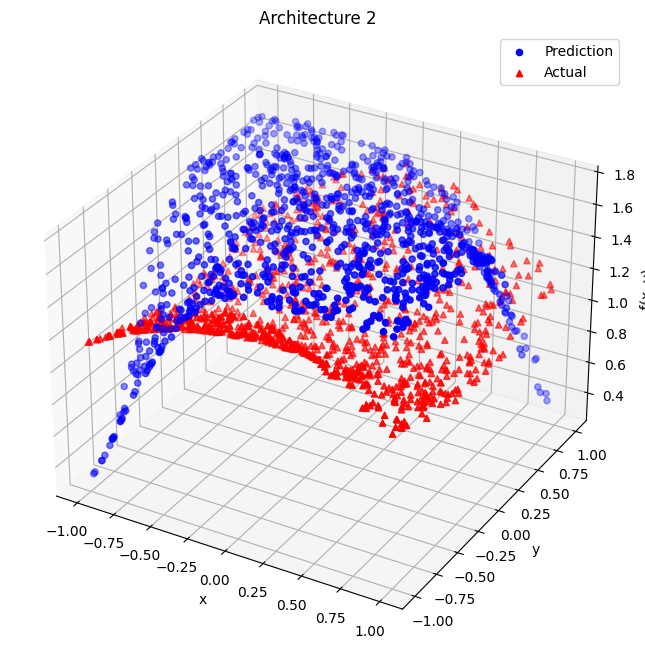

train loss: 6.50e-02 | test loss: 7.15e-02 | reg: 2.32e+00 : 100%|█| 100/100 [00:49<00:00,  2.02it/s


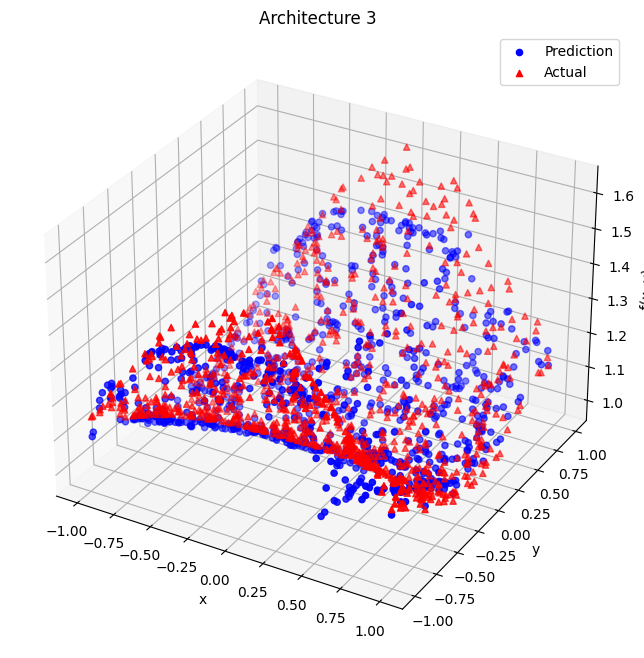

In [ ]:
for i in range(len(models)):
    model.train(dataset, opt="LBFGS", steps=100);
    # Perform a forward pass to get predictions
    predicted = models[i](dataset['test_input'])
    # Plot comparison of predicted vs real function values for created input
    ThreeD_plot_prediction_vs_actual(predicted, dataset['test_label'], dataset['test_input'], title=f'Architecture {i}',xlabel='x', ylabel='y', zlabel='f(x, y)')

### COMPARISON BETWEEN MLP (100 PARAMETERS) VS KAN (100 PARAMETERS) FOR PREVIOUS FORMULA

## Implementing the MLP class

Now we implement the MLP class and the training method for this class

In [ ]:
class SimpleMLP(torch.nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        '''
        input_size: int representing the dimensions of the inputs
        hidden_sizes: array of int representing the number of neurons in each hidden size
        output_size: int representing the dimensions of the outputs

        This function receives the MLP architecture sizes and creates it

        '''
        super(SimpleMLP, self).__init__()

        # Define layers
        self.layers = torch.nn.ModuleList()

        # Input layer
        self.layers.append(torch.nn.Linear(input_size, hidden_sizes[0]))

        # Hidden layers
        for i in range(1, len(hidden_sizes)):
            self.layers.append(torch.nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))

        # Output layer
        self.layers.append(torch.nn.Linear(hidden_sizes[-1], output_size))

    def forward(self, x):
        '''
        x: torch.Tensor representing the input data

        This function defines the forward pass of the network.
        It passes the input data through each layer, applying the ReLU activation function after each hidden layer, and returns the final output.

        '''
        for i in range(len(self.layers) - 1):
            x = F.relu(self.layers[i](x))
        x = self.layers[-1](x)
        return x


In [ ]:
import time
import torch

def train_mlp(model, x_train, y_train, x_test, y_test, num_epochs=10000, optimizer):
    '''
    Trains the created MLP model using the training data and evaluates its performance using the test data.

    Parameters:
        model: class defined previously
        x_train: torch.Tensor, input training data
        y_train: torch.Tensor, target training data
        x_test: torch.Tensor, input test data
        y_test: torch.Tensor, target test data
        num_epochs: int, number of training epochs (default 10000)
        learning_rate: float, learning rate for the optimizer (default 0.01)

    Returns:
        train_losses: float list, training losses computed during each epoch
        test_losses: float list, test losses computed during each epoch
    '''
    # We are actually using RMSE to be fair with KAN error issue (stated in report)
    criterion = torch.nn.MSELoss()
    train_losses = []
    test_losses = []

    start_time = time.time()  # Start the timer

    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass and compute the training loss
        y_pred_train = model(x_train)
        # Root squared to perform RMSE
        train_loss = torch.sqrt(criterion(y_pred_train, y_train))
        train_losses.append(train_loss.item())

        # Compute the test loss
        model.eval()
        with torch.no_grad():
            y_pred_test = model(x_test)
            # Root squared to perform RMSE
            test_loss = torch.sqrt(criterion(y_pred_test, y_test))
            test_losses.append(test_loss.item())

        # Backpropagation and update the parameters
        train_loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

    end_time = time.time()  # End the timer
    training_time = end_time - start_time  # Calculate the training time
    print(f'Total Training Time: {training_time:.2f} seconds')

    return train_losses, test_losses


## Training the model

Now we create and train the model over previous dataset

In [ ]:
input_size = 2
hidden_sizes = [10, 10]  # 2 hidden layers with 10 neurons each
output_size = 1

mlp = SimpleMLP(input_size, hidden_sizes, output_size)
optimizer = torch.optim.Adam(model.parameters(), lr= 0.1)
train_losses, test_losses = train_mlp(mlp, dataset['train_input'], dataset['train_label'], dataset['test_input'], dataset['test_label'], num_epochs=2000, optimizer=optimizer)


## Visualizing results

We create functions to be able to visualize the training and test losses and the predictions made by the model.

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plot_2d(axes[0], train_losses, title='Train loss MLP with 100 params', xlabel='epoch', ylabel='MSE', label='', show_knots=False, show_grid=False, step_size=200)
plot_2d(axes[1], test_losses, title='Test loss MLP with 100 params', xlabel='epoch', ylabel='MSE', label='', show_knots=False, show_grid=False, step_size=200)
print(f'Last train loss: {train_losses[-1]}\nLast test loss: {test_losses[-1]}')

# Predictions of the test data
y_test_pred = mlp(dataset['test_input'])

ThreeD_plot_prediction_vs_actual(y_test_pred, dataset['test_label'], dataset['test_input'])

As we can appreciate, for an MLP with 100 parameters, we have obtained a minimum MSE loss of [insertatr minima] with 2000 epochs, with training time 4s. Now, we will set up from zero a KAN that uses 100 parameters, and compare the results.

In [ ]:
# For that, we need a KAN with bsplines of 3rd order and grid size 47

# Create the model and initialize it
model3 = KAN(width=[2,1,1], grid=47, k=3)
model3(dataset['train_input']);


# Perform the training step
results3 = model3.train(dataset, opt="Adam", steps=2000, lr=0.1);
model3.plot()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Generate losses plots
plot_2d(axes[0], results2['train_loss'], title='Train loss', xlabel='epoch', ylabel='RMSE')
plot_2d(axes[1], results2['test_loss'], title='Test loss', xlabel='epoch', ylabel='RMSE')